### <font color='red'> Exploratory work </font>

In [1]:
import numpy as np
import xarray as xr
import matplotlib as mpl
#mpl.use('Agg') # Must be before importing matplotlib.pyplot or pylab!
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import timeit
#start_time = timeit.default_timer()
from datetime import datetime,timedelta



Plot parameters

In [2]:
mpl.rcParams['axes.linewidth'] = 2.0 #set the value globally

plt.rc('font', family='serif',size = 16)  # controls default text layout
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=16)  # fontsize of the figure title

#plt.minorticks_on()
plt.rc('text', usetex=False)
#sns.set(font = "Garamond",font_scale=1.5,style="whitegrid")
sns.set(font_scale=1.5,style="whitegrid")
#sns.set(font = "Cambria",font_scale=1.5,style="white")

#mpl.rc_file_defaults() #undos seaborn effects

#custom fontsize, if needed
font = 12

%matplotlib inline

## Plot the simulated tower data at the WLEF tall tower for 32 and 122m heights. Both 1 minute, high frequency data and 1 hour averaged data. For winds, T and q. For both the IOP test cases. 

### Redoing IOP03 code for IOP02, to make half hourly averaged plots.

In [3]:
tower_data = xr.open_dataset('tower_and_meta_data.nc')
tower_data.close()

#calculate time variable and offset for UTC
tower_data['time'] = (tower_data.DOY+tower_data.hour/24+tower_data.minute/60/24 - 5/24)
tower_data['time'] = tower_data['time']
#set local(CDT) time as a coordinate
tower_data = tower_data.set_coords(['time'])

#subset for 2019 Sep 24 and Sep25
#f1 = tower_data.time>=267
#f2 = tower_data.time<=269
#subset for 2019 Aug 23 and 24
f1 = tower_data.time>=235
f2 = tower_data.time<=237
tower_data = tower_data.where(f1 & f2, drop=True)

#subset all >30m towers 
tower_data = tower_data.where(tower_data.z_meas>=30, drop=True)

tower_name_list = tower_data.tower.values

#subset for time, because simulated tower data only start at 5:00 CDT on 23rd and go on till 20:00 on 24
#for IOP02
tower_data = tower_data.isel(timestep=slice(9,88))



In [11]:
tower_data

<xarray.Dataset>
Dimensions:   (timestep: 79, tower: 12)
Coordinates:
  * timestep  (timestep) float32 3092.0 3093.0 3094.0 ... 3168.0 3169.0 3170.0
  * tower     (tower) |S3 b'nw1' b'nw4' b'ne1' b'ne2' ... b'se2' b'se3' b'se6'
    time      (timestep) float64 235.2 235.2 235.3 235.3 ... 236.8 236.8 236.8
Data variables:
    cov_wT    (timestep, tower) float32 nan nan nan ... nan -0.040575635
    cov_wH2O  (timestep, tower) float32 nan nan ... 0.00011012288 0.008371787
    cov_wCO2  (timestep, tower) float32 nan 3.2873006 nan ... nan 4.218367
    f_Hs      (timestep, tower) float32 nan nan nan ... nan -46.565163
    f_Hl      (timestep, tower) float32 nan nan nan ... 0.19211948 14.62629
    f_CO2     (timestep, tower) float32 nan 3.2873006 nan ... nan 4.218367
    ustar     (timestep, tower) float32 0.093750365 nan ... 0.1663326 0.22997157
    wstar     (timestep, tower) float32 9.96921e+36 9.96921e+36 ... 9.96921e+36
    R_net     (timestep, tower) float32 nan nan nan ... -77.62585 -81.11471
    ghf       (timestep, tower) float32 -9.8621435 -13.070833 ... -7.9857564
    S_store   (timestep, tower) float32 -10.726784 -13.613643 ... -28.955198
    T_store   (timestep, tower) float32 nan -2.380881 ... -22.817564 -17.578283
    Q_store   (timestep, tower) float32 nan -0.68177795 ... -5.123493 -6.606099
    u         (timestep, tower) float32 -0.82647675 -0.58485526 ... -1.487267
    v         (timestep, tower) float32 -0.35459593 -0.54859847 ... 1.6453543
    w         (timestep, tower) float32 -0.021794753 0.0252656 ... -0.011205262
    T         (timestep, tower) float32 283.0763 281.3218 ... 291.24847
    q         (timestep, tower) float32 nan 11.239947 ... 14.322884 14.491939
    year      (timestep, tower) float32 2019.0 2019.0 2019.0 ... 2019.0 2019.0
    month     (timestep, tower) float32 8.0 8.0 8.0 8.0 8.0 ... 8.0 8.0 8.0 8.0
    day       (timestep, tower) float32 23.0 23.0 23.0 23.0 ... 25.0 25.0 25.0
    DOY       (timestep, tower) float64 235.0 235.0 235.0 ... 237.0 237.0 237.0
    hour      (timestep, tower) float32 10.0 10.0 10.0 10.0 ... 1.0 1.0 1.0 1.0
    minute    (timestep, tower) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    z_meas    (tower, timestep) float32 32.0 32.0 32.0 32.0 ... 32.0 32.0 32.0

No handles with labels found to put in legend.


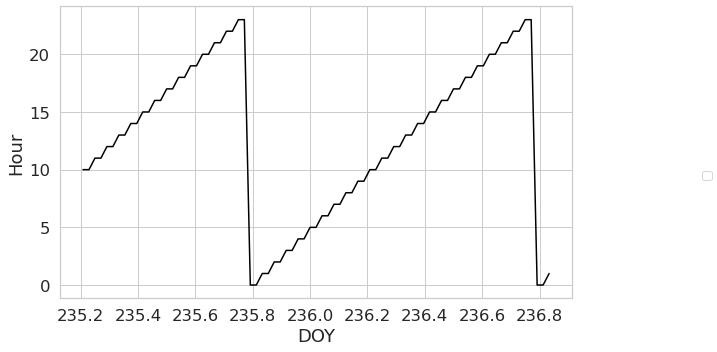

In [12]:
fig = plt.figure(figsize=(10,5))
ax = fig.subplots(1,1)

(tower_data['hour']).mean(dim='tower').plot(ax=ax,color='black',x='time')

ax.set_xlabel('DOY',fontsize=18)
ax.set_ylabel('Hour',fontsize=18)
fig.legend(loc=7,fontsize=12)
fig.tight_layout()
fig.subplots_adjust(right=0.8)


The hour variable is in UTC

In [8]:
(tower_data['hour']).mean(dim='tower')

<xarray.DataArray 'hour' (timestep: 79)>
array([10., 10., 11., 11., 12., 12., 13., 13., 14., 14., 15., 15., 16.,
       16., 17., 17., 18., 18., 19., 19., 20., 20., 21., 21., 22., 22.,
       23., 23.,  0.,  0.,  1.,  1.,  2.,  2.,  3.,  3.,  4.,  4.,  5.,
        5.,  6.,  6.,  7.,  7.,  8.,  8.,  9.,  9., 10., 10., 11., 11.,
       12., 12., 13., 13., 14., 14., 15., 15., 16., 16., 17., 17., 18.,
       18., 19., 19., 20., 20., 21., 21., 22., 22., 23., 23.,  0.,  0.,
        1.], dtype=float32)
Coordinates:
  * timestep  (timestep) float32 3092.0 3093.0 3094.0 ... 3168.0 3169.0 3170.0
    time      (timestep) float64 235.2 235.2 235.3 235.3 ... 236.8 236.8 236.8

Number of values also look cool. 79

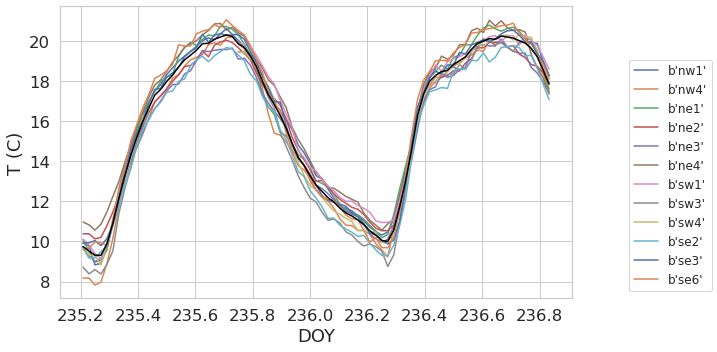

In [9]:
#temperature from tower data
var = 'T'
fig = plt.figure(figsize=(10,5))
ax = fig.subplots(1,1)

for i, tower_name in enumerate(tower_data.tower):
    (tower_data[var]-273.15).sel(tower=tower_name.values).plot(ax=ax,label=str(tower_name.values),x='time')
    #ax.plot(np.asarray(tower_data.DOY+tower_data.hour/24+tower_data.minute/60/24), np.asarray(tower_data[var].sel(tower=tower_name)),label=str(tower_name_list[i]))

(tower_data[var]-273.15).mean(dim='tower').plot(ax=ax,color='black',x='time')

ax.set_xlabel('DOY',fontsize=18)
ax.set_ylabel('T (C)',fontsize=18)
fig.legend(loc=7,fontsize=12)
fig.tight_layout()
fig.subplots_adjust(right=0.8)


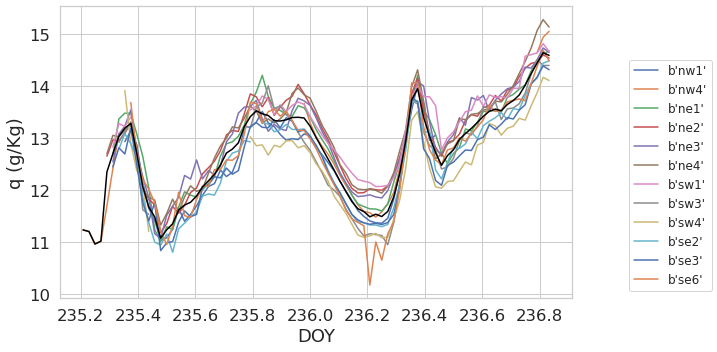

In [8]:
var = 'q'
fig = plt.figure(figsize=(10,5))
ax = fig.subplots(1,1)

for i, tower_name in enumerate(tower_data.tower):
    (tower_data[var]).sel(tower=tower_name.values).plot(ax=ax,label=str(tower_name.values),x='time')
    #ax.plot(np.asarray(tower_data.DOY+tower_data.hour/24+tower_data.minute/60/24), np.asarray(tower_data[var].sel(tower=tower_name)),label=str(tower_name_list[i]))

(tower_data[var]).mean(dim='tower').plot(ax=ax,color='black',x='time')

ax.set_xlabel('DOY',fontsize=18)
ax.set_ylabel('q (g/Kg)',fontsize=18)
fig.legend(loc=7,fontsize=12)
fig.tight_layout()
fig.subplots_adjust(right=0.8)


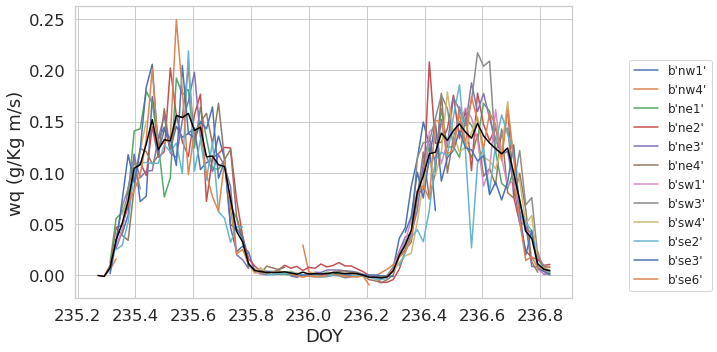

In [9]:
#covariance from tower data
var = 'cov_wH2O'
#var = 'cov_wT'

fig = plt.figure(figsize=(10,5))
ax = fig.subplots(1,1)

for i, tower_name in enumerate(tower_data.tower):
    (tower_data[var]).sel(tower=tower_name.values).plot(ax=ax,label=str(tower_name.values),x='time')
    #ax.plot(np.asarray(tower_data.DOY+tower_data.hour/24+tower_data.minute/60/24), np.asarray(tower_data[var].sel(tower=tower_name)),label=str(tower_name_list[i]))

(tower_data[var]).mean(dim='tower').plot(ax=ax,color='black',x='time')

ax.set_xlabel('DOY',fontsize=18)
# ax.set_ylabel('wT (K m/s)',fontsize=18)
# ax.set_ylim([-0.25,0.3])

ax.set_ylabel('wq (g/Kg m/s)',fontsize=18)
#ax.set_ylim([-0.05,0.22])

fig.legend(loc=7,fontsize=12)
fig.tight_layout()
fig.subplots_adjust(right=0.8)



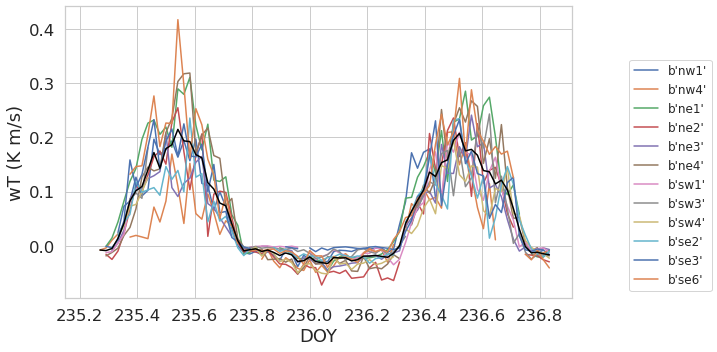

In [10]:
#covariance from tower data
#var = 'cov_wH2O'
var = 'cov_wT'

fig = plt.figure(figsize=(10,5))
ax = fig.subplots(1,1)

for i, tower_name in enumerate(tower_data.tower):
    (tower_data[var]).sel(tower=tower_name.values).plot(ax=ax,label=str(tower_name.values),x='time')
    #ax.plot(np.asarray(tower_data.DOY+tower_data.hour/24+tower_data.minute/60/24), np.asarray(tower_data[var].sel(tower=tower_name)),label=str(tower_name_list[i]))

(tower_data[var]).mean(dim='tower').plot(ax=ax,color='black',x='time')

ax.set_xlabel('DOY',fontsize=18)
ax.set_ylabel('wT (K m/s)',fontsize=18)
# ax.set_ylim([-0.25,0.3])

#ax.set_ylabel('wq (g/Kg m/s)',fontsize=18)
#ax.set_ylim([-0.05,0.22])

fig.legend(loc=7,fontsize=12)
fig.tight_layout()
fig.subplots_adjust(right=0.8)



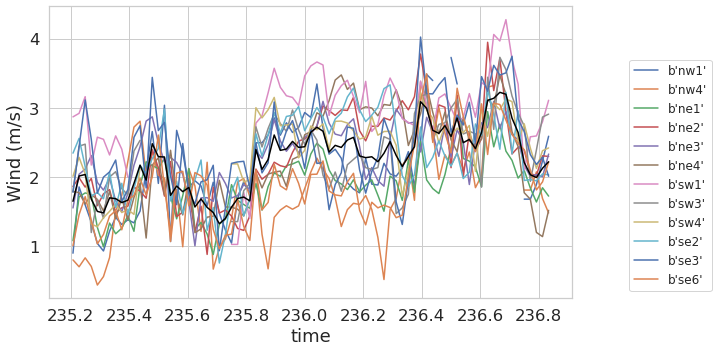

In [11]:
#wind plots
fig = plt.figure(figsize=(10,5))
ax = fig.subplots(1,1)

for tower_name in tower_data.tower:
    u = (tower_data['u']).sel(tower=tower_name.values)
    v = (tower_data['v']).sel(tower=tower_name.values)
    w = (tower_data['w']).sel(tower=tower_name.values)
    wind  = (u*u + v*v + w*w)**0.5  
    wind.plot(ax=ax,label=str(tower_name.values),x='time')


u = (tower_data['u'])
v = (tower_data['v'])
w = (tower_data['w'])
wind  = (u*u + v*v + w*w)**0.5  
(wind).mean(dim='tower').plot(ax=ax,color='black',x='time')

ax.set_ylabel('Wind (m/s)',fontsize=18)
fig.legend(loc=7,fontsize=12)
fig.tight_layout()
fig.subplots_adjust(right=0.8)


## Check simulated data now

In [1]:
#commbine the 3D data

In [3]:
#%% data folder
#source = '/bog/incoming/CHEESEHEAD/palm/realistic_runs/ches_IOP2/ensemble.member.1/'
source = '/bog/incoming/CHEESEHEAD/palm/realistic_runs/ches_IOP03/OUTPUT/ensemble.member.1/'

data = 'DATA_3D_AV_NETCDF_N03slice'

#os.chdir(source)
#get list of all the folders
folder_list = os.listdir(source)

folder_list.sort()
folder_list

['01.ches_IOP3.19457',
 '02.ches_IOP3.8195',
 '03.ches_IOP3.189',
 '04.ches_IOP3.4230',
 '05.ches_IOP3.25038',
 '06.ches_IOP3.10580',
 '07.ches_IOP3.3465',
 '08.ches_IOP3.7653',
 '09. ches_IOP3.14688']

In [4]:
x_list = [2217,3981,6159,8619,9225,9669,723,3249,5391,6801,8091,9537]
y_list = [9147,9951,9309,7335,9465,8019,2799,3441,5499,5199,4161,3333]
site_name = ['nw1', 'nw4', 'ne1', 'ne2', 'ne3', 'ne4', 'sw1', 'sw3','sw4', 'se2', 'se3', 'se6']

#list to club all vm data
site_theta_list = []
site_q_list = []
site_wind_list = []
site_wtheta_list = []
site_wq_list = []


In [5]:
#looping through each site first
for i, site in enumerate(site_name):
    
    
         
    #os.chdir(source)
    #get list of all the folders
    folder_list = os.listdir(source)
    folder_list.sort()
    
    
    #list to combine the data for one site
    theta_list = []
    q_list = []
    wtheta_list = []
    wq_list = []
    #first collect data at all times for one site
    for j, folder in enumerate(folder_list):
        #for time> 5 hours, i > 1 
        #open data file inside the folder.
        ds = xr.open_dataset(source + '/' + folder + '/' + data)
        ds.close()
        #subset for variables
        ds = ds[['w','theta','wtheta','q','wq']]#.sel(zw_3d = height_level)
        ds = ds.sel(x=x_list[i],y=y_list[i])

        #read in variables to data arrays, renaming the coords for theta and q to interpolate
        w = ds.w
        wtheta = ds.wtheta
        wq = ds.wq

        theta = ds.theta.rename({'zu_3d': 'zw_3d'})
        theta_interpolated = theta.interp_like(w)
        q = ds.q.rename({'zu_3d': 'zw_3d'})
        q_interpolated = q.interp_like(w)

        #calculate the fluxes

        wtheta_turb = wtheta.sel(zw_3d=32) - w.sel(zw_3d=32)*theta_interpolated.sel(zw_3d=32)
        wq_turb = wq.sel(zw_3d=32) - w.sel(zw_3d=32)*q_interpolated.sel(zw_3d=32)

        wtheta_list.append(wtheta_turb)
        wq_list.append(wq_turb)
        theta_list.append(theta_interpolated.sel(zw_3d=32))
        q_list.append(q_interpolated.sel(zw_3d=32))


        print('Done!' + folder)
    
    #for each tower location combine the flux data        
    wtheta_ds = xr.concat(wtheta_list, dim='time')
    
    wq_ds = xr.concat(wq_list, dim='time')
    
    theta_ds = xr.concat(theta_list, dim='time')
    
    q_ds = xr.concat(q_list, dim='time')

    site_wtheta_list.append(wtheta_ds)
    site_wq_list.append(wq_ds)
    site_theta_list.append(theta_ds)
    site_q_list.append(q_ds)
    
            
    print('done!' + site)
    
# #outside of the loop
# #concatenate all the flux data data

Done!01.ches_IOP3.19457
Done!02.ches_IOP3.8195
Done!03.ches_IOP3.189
Done!04.ches_IOP3.4230
Done!05.ches_IOP3.25038
Done!06.ches_IOP3.10580
Done!07.ches_IOP3.3465
Done!08.ches_IOP3.7653
Done!09. ches_IOP3.14688
done!nw1
Done!01.ches_IOP3.19457
Done!02.ches_IOP3.8195
Done!03.ches_IOP3.189
Done!04.ches_IOP3.4230
Done!05.ches_IOP3.25038
Done!06.ches_IOP3.10580
Done!07.ches_IOP3.3465
Done!08.ches_IOP3.7653
Done!09. ches_IOP3.14688
done!nw4
Done!01.ches_IOP3.19457
Done!02.ches_IOP3.8195
Done!03.ches_IOP3.189
Done!04.ches_IOP3.4230
Done!05.ches_IOP3.25038
Done!06.ches_IOP3.10580
Done!07.ches_IOP3.3465
Done!08.ches_IOP3.7653
Done!09. ches_IOP3.14688
done!ne1
Done!01.ches_IOP3.19457
Done!02.ches_IOP3.8195
Done!03.ches_IOP3.189
Done!04.ches_IOP3.4230
Done!05.ches_IOP3.25038
Done!06.ches_IOP3.10580
Done!07.ches_IOP3.3465
Done!08.ches_IOP3.7653
Done!09. ches_IOP3.14688
done!ne2
Done!01.ches_IOP3.19457
Done!02.ches_IOP3.8195
Done!03.ches_IOP3.189
Done!04.ches_IOP3.4230
Done!05.ches_IOP3.25038
Done

In [6]:
wtheta_simulated = xr.Dataset(data_vars={"wtheta": xr.concat(site_wtheta_list, pd.Index(site_name,name='tower'))})
wq_simulated = xr.Dataset(data_vars={"wq": xr.concat(site_wq_list, pd.Index(site_name,name='tower'))})
theta_simulated = xr.Dataset(data_vars={"theta": xr.concat(site_theta_list, pd.Index(site_name,name='tower'))})
q_simulated = xr.Dataset(data_vars={"q": xr.concat(site_q_list, pd.Index(site_name,name='tower'))})


In [10]:
#subset the data for hours 5:00 local on day1 and later
wtheta_simulated = wtheta_simulated.isel(time=slice(9,None))
wq_simulated = wq_simulated.isel(time=slice(9,None))
theta_simulated = theta_simulated.isel(time=slice(9,None))
q_simulated = q_simulated.isel(time=slice(9,None))


In [7]:
pwd()

'/bog/incoming/CHEESEHEAD/palm/realistic_runs/python_scripts/spaleri'

In [11]:
#save the subset
wtheta_simulated.to_netcdf('/bog/incoming/CHEESEHEAD/palm/realistic_runs/python_scripts/spaleri/work/wtheta_simulated_IOP3.nc')
wq_simulated.to_netcdf('/bog/incoming/CHEESEHEAD/palm/realistic_runs/python_scripts/spaleri/work/wq_simulated_IOP3.nc')
theta_simulated.to_netcdf('/bog/incoming/CHEESEHEAD/palm/realistic_runs/python_scripts/spaleri/work/theta_simulated_IOP3.nc')
q_simulated.to_netcdf('/bog/incoming/CHEESEHEAD/palm/realistic_runs/python_scripts/spaleri/work/q_simulated_IOP3.nc')


Looks like the data starts only at 8:00 simulated time. Adding in data from 5:00 till 8:00

In [65]:
'''
source = '/bog/incoming/CHEESEHEAD/palm/realistic_runs/ches_IOP2/ensemble.member.1/02.ches_IOP2.10023/'

data = 'DATA_3D_AV_NETCDF_N03slice'
#looping through each site first
site_wtheta_list = []
site_wq_list = []
site_theta_list = []
site_q_list = []

for i, site in enumerate(site_name): 
                
    
    #list to combine the data for one site
    theta_list = []
    q_list = []
    wtheta_list = []
    wq_list = []
    #first collect data at all times for one site
    #open data file inside the folder.
    ds = xr.open_dataset(source + '/' + data)
    ds.close()
    #subset for variables
    ds = ds[['w','theta','wtheta','q','wq']]#.sel(zw_3d = height_level)
    ds = ds.sel(x=x_list[i],y=y_list[i])

    #read in variables to data arrays, renaming the coords for theta and q to interpolate
    w = ds.w
    wtheta = ds.wtheta
    wq = ds.wq

    theta = ds.theta.rename({'zu_3d': 'zw_3d'})
    theta_interpolated = theta.interp_like(w)
    q = ds.q.rename({'zu_3d': 'zw_3d'})
    q_interpolated = q.interp_like(w)

    #calculate the fluxes
    wtheta_turb = wtheta.sel(zw_3d=32) - w.sel(zw_3d=32)*theta_interpolated.sel(zw_3d=32)
    wq_turb = wq.sel(zw_3d=32) - w.sel(zw_3d=32)*q_interpolated.sel(zw_3d=32)

    wtheta_list.append(wtheta_turb)
    wq_list.append(wq_turb)
    theta_list.append(theta_interpolated.sel(zw_3d=32))
    q_list.append(q_interpolated.sel(zw_3d=32))
    print('Done!')
    
    #for each tower location combine the flux data        
    wtheta_ds = xr.concat(wtheta_list, dim='time')
    
    wq_ds = xr.concat(wq_list, dim='time')
    
    theta_ds = xr.concat(theta_list, dim='time')
    
    q_ds = xr.concat(q_list, dim='time')

    site_wtheta_list.append(wtheta_ds)
    site_wq_list.append(wq_ds)
    site_theta_list.append(theta_ds)
    site_q_list.append(q_ds)
    
            
    print('done!' + site)

wtheta_simulated1 = xr.Dataset(data_vars={"wtheta": xr.concat(site_wtheta_list, pd.Index(site_name,name='tower'))})
wq_simulated1 = xr.Dataset(data_vars={"wq": xr.concat(site_wq_list, pd.Index(site_name,name='tower'))})
theta_simulated1 = xr.Dataset(data_vars={"theta": xr.concat(site_theta_list, pd.Index(site_name,name='tower'))})
q_simulated1 = xr.Dataset(data_vars={"q": xr.concat(site_q_list, pd.Index(site_name,name='tower'))})
'''

Done!
done!nw1
Done!
done!nw4
Done!
done!ne1
Done!
done!ne2
Done!
done!ne3
Done!
done!ne4
Done!
done!sw1
Done!
done!sw3
Done!
done!sw4
Done!
done!se2
Done!
done!se3
Done!
done!se6


In [66]:
wtheta_simulated1

<xarray.Dataset>
Dimensions:  (time: 15, tower: 12)
Coordinates:
    x        (tower) float64 2.217e+03 3.981e+03 ... 8.091e+03 9.537e+03
    y        (tower) float64 9.147e+03 9.951e+03 ... 4.161e+03 3.333e+03
  * time     (time) timedelta64[ns] 01:00:00.600000035 ... 08:00:00.600000279
    zw_3d    float64 32.0
  * tower    (tower) object 'nw1' 'nw4' 'ne1' 'ne2' ... 'sw4' 'se2' 'se3' 'se6'
Data variables:
    wtheta   (tower, time) float64 0.001542 0.0003295 ... 0.001311 0.0205

In [67]:
wtheta_simulated

<xarray.Dataset>
Dimensions:  (time: 72, tower: 12)
Coordinates:
    x        (tower) float64 ...
    y        (tower) float64 ...
  * time     (time) timedelta64[ns] 08:30:00.600000297 ... 1 days 20:00:00.21...
    zw_3d    float64 ...
  * tower    (tower) object 'nw1' 'nw4' 'ne1' 'ne2' ... 'sw4' 'se2' 'se3' 'se6'
Data variables:
    wtheta   (tower, time) float64 ...

In [75]:
#update the datasets
wtheta_simulated = xr.concat([wtheta_simulated1,wtheta_simulated], dim='time').sortby('time').isel(time=slice(8,None))

In [77]:
theta_simulated = xr.concat([theta_simulated1,theta_simulated], dim='time').sortby('time').isel(time=slice(8,None))
q_simulated = xr.concat([q_simulated1,q_simulated], dim='time').sortby('time').isel(time=slice(8,None))
wq_simulated = xr.concat([wq_simulated1,wq_simulated], dim='time').sortby('time').isel(time=slice(8,None))

### Read in the prepared simulated data

In [4]:
wtheta_simulated = xr.open_dataset('work/wtheta_simulated_IOP2.nc')
wtheta_simulated.close()
wq_simulated = xr.open_dataset('work/wq_simulated_IOP2.nc')
wq_simulated.close()
theta_simulated = xr.open_dataset('work/theta_simulated_IOP2.nc')
theta_simulated.close()
q_simulated = xr.open_dataset('work/q_simulated_IOP2.nc')
q_simulated.close()

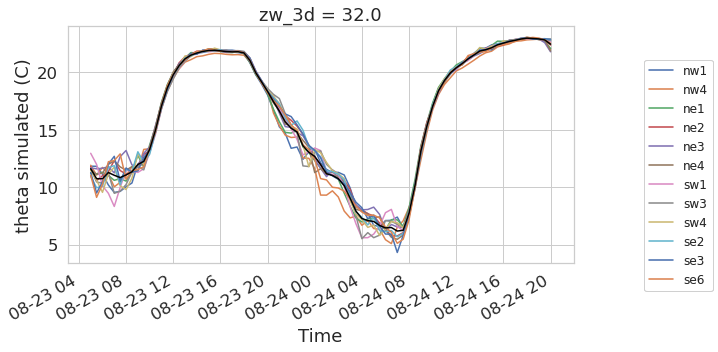

In [12]:
#var = theta
#theta_simulated['time'] = pd.to_datetime('2019-08-23') + theta_simulated['time'].values

fig = plt.figure(figsize=(10,5))
ax = fig.subplots(1,1)
for tower_name in theta_simulated.tower:
    (theta_simulated['theta'].sel(tower=tower_name.values)-273.15).plot(ax=ax,label=str(tower_name.values),x='time')

(theta_simulated['theta'].mean('tower')-273.15).plot(ax=ax,color ='black',x='time')

fig.legend(loc=7,fontsize=12)
ax.set_xlabel('Time',fontsize=18)
ax.set_ylabel('theta simulated (C)',fontsize=18)
#ax.set_ylim([-0.25,0.3])
fig.legend(loc=7,fontsize=12)
fig.tight_layout()
fig.subplots_adjust(right=0.8)


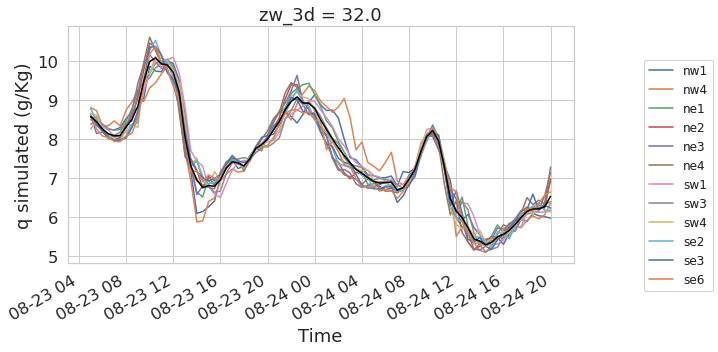

In [15]:
#var = q
#q_simulated['time'] = pd.to_datetime('2019-08-23') + q_simulated['time'].values

fig = plt.figure(figsize=(10,5))
ax = fig.subplots(1,1)
for tower_name in q_simulated.tower:
    (q_simulated['q'].sel(tower=tower_name.values)*1000).plot(ax=ax,label=str(tower_name.values),x='time')

(q_simulated['q'].mean('tower')*1000).plot(ax=ax,color ='black',x='time')

fig.legend(loc=7,fontsize=12)
ax.set_xlabel('Time',fontsize=18)
ax.set_ylabel('q simulated (g/Kg)',fontsize=18)
#ax.set_ylim([-0.25,0.3])
fig.legend(loc=7,fontsize=12)
fig.tight_layout()
fig.subplots_adjust(right=0.8)


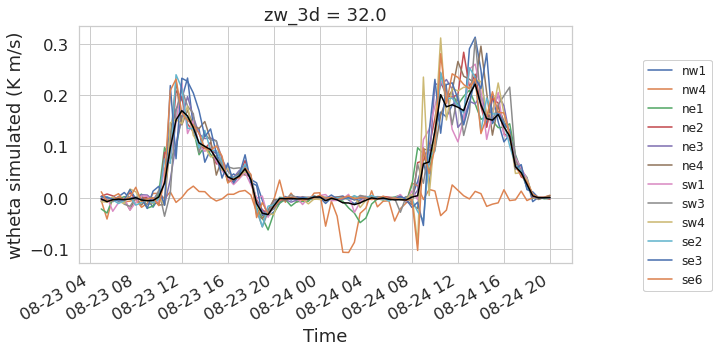

In [16]:
#var = wtheta
#wtheta_simulated['time'] = pd.to_datetime('2019-08-23') + wtheta_simulated['time'].values

fig = plt.figure(figsize=(10,5))
ax = fig.subplots(1,1)
for tower_name in wtheta_simulated.tower:
    wtheta_simulated['wtheta'].sel(tower=tower_name.values).plot(ax=ax,label=str(tower_name.values),x='time')

wtheta_simulated['wtheta'].mean('tower').plot(ax=ax,color ='black',x='time')

fig.legend(loc=7,fontsize=12)
ax.set_xlabel('Time',fontsize=18)
ax.set_ylabel('wtheta simulated (K m/s)',fontsize=18)
#ax.set_ylim([-0.25,0.3])
fig.legend(loc=7,fontsize=12)
fig.tight_layout()
fig.subplots_adjust(right=0.8)


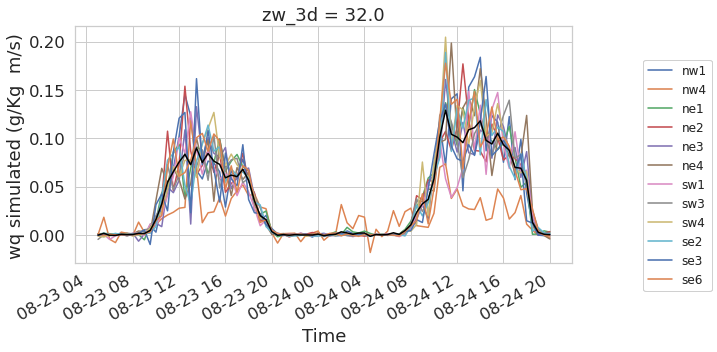

In [17]:

#var = wq
#wq_simulated['time'] = pd.to_datetime('2019-08-23') + wq_simulated['time'].values

fig = plt.figure(figsize=(10,5))
ax = fig.subplots(1,1)
for tower_name in wq_simulated.tower:
    (wq_simulated['wq']*1000).sel(tower=tower_name.values).plot(ax=ax,label=str(tower_name.values))
(wq_simulated['wq']*1000).mean('tower').plot(ax=ax,color ='black')

fig.legend(loc=7,fontsize=12)
ax.set_xlabel('Time',fontsize=18)
ax.set_ylabel('wq simulated (g/Kg  m/s)',fontsize=18)
#ax.set_ylim([-0.05,0.22])

fig.legend(loc=7,fontsize=12)
fig.tight_layout()
fig.subplots_adjust(right=0.8)

### Make scatter plots between tower and simulated data

In [7]:
tower_data

<xarray.Dataset>
Dimensions:   (timestep: 96, tower: 12)
Coordinates:
  * timestep  (timestep) float32 3083.0 3084.0 3085.0 ... 3176.0 3177.0 3178.0
  * tower     (tower) |S3 b'nw1' b'nw4' b'ne1' b'ne2' ... b'se2' b'se3' b'se6'
    time      (timestep) float64 235.0 235.0 235.1 235.1 ... 237.0 237.0 237.0
Data variables:
    cov_wT    (timestep, tower) float32 -0.011210094 nan ... -0.03418756
    cov_wH2O  (timestep, tower) float32 -0.0022130986 0.00449811 ... 0.008112952
    cov_wCO2  (timestep, tower) float32 3.227769 13.763377 ... 4.6885448
    f_Hs      (timestep, tower) float32 -13.164713 nan ... -37.28302 -39.423794
    f_Hl      (timestep, tower) float32 -3.9807677 8.143591 ... 14.267624
    f_CO2     (timestep, tower) float32 3.227769 13.763377 ... 4.6885448
    ustar     (timestep, tower) float32 0.097161725 0.118957125 ... 0.6384681
    wstar     (timestep, tower) float32 9.96921e+36 9.96921e+36 ... 9.96921e+36
    R_net     (timestep, tower) float32 -78.67239 nan ... -22.084446 -23.16859
    ghf       (timestep, tower) float32 -6.4383335 -9.522961 ... nan -7.159959
    S_store   (timestep, tower) float32 -14.131655 -13.958639 ... nan 4.217908
    T_store   (timestep, tower) float32 3.146473 -5.481168 ... nan 2.3848097
    Q_store   (timestep, tower) float32 4.6670804 -5.600219 ... nan 0.64033204
    u         (timestep, tower) float32 -1.3462633 -0.69010794 ... -1.6800188
    v         (timestep, tower) float32 -1.156352 -0.77762955 ... 3.0322406
    w         (timestep, tower) float32 -0.19149718 0.11979944 ... 0.0038103736
    T         (timestep, tower) float32 284.7025 283.32306 ... 289.48706
    q         (timestep, tower) float32 12.320233 12.341978 ... 15.207115
    year      (timestep, tower) float32 2019.0 2019.0 2019.0 ... 2019.0 2019.0
    month     (timestep, tower) float32 8.0 8.0 8.0 8.0 8.0 ... 8.0 8.0 8.0 8.0
    day       (timestep, tower) float32 23.0 23.0 23.0 23.0 ... 25.0 25.0 25.0
    DOY       (timestep, tower) float64 235.0 235.0 235.0 ... 237.0 237.0 237.0
    hour      (timestep, tower) float32 5.0 5.0 5.0 5.0 5.0 ... 5.0 5.0 5.0 5.0
    minute    (timestep, tower) float32 30.0 30.0 30.0 30.0 ... 0.0 0.0 0.0 0.0
    z_meas    (tower, timestep) float32 32.0 32.0 32.0 32.0 ... 32.0 32.0 32.0

## create a pandas dataframe with both the observed and simulated values

In [5]:
#function to create a combined pd dataframe
def combine_obs_sim(ds_sim,ds_obs,var_sim,tower_data_column):
    df = pd.DataFrame()
    df = ds_sim[var_sim].to_dataframe()
    #print(len(tower_data.T.to_dataframe()))
    new_column_name = var_sim+'_simulated'
    df.rename(columns = {var_sim:new_column_name}, inplace = True)
    df = df.reset_index()
    #convert the tower data netcdf to a dataframe so that we can have both measured and simulated values together
    check_df = tower_data[tower_data_column].to_dataframe()
    #data check
    #check_df.head()
    #reorder the dataframe index levels to have the towers first and then timestep
    #so that all of the times for one tower is captured in one block
    check_df = check_df.reset_index().sort_values(by=['tower','timestep'])
    #data check
    #check_df['T']
    output_df_measured_column = tower_data_column+'_measured'
    df[output_df_measured_column] = check_df[tower_data_column].values
    df['hour'] = df.time.dt.hour
    f1 = df['hour'] > 5
    f2 = df['hour'] < 20
    df['day_night'] = 'night'
    #df_sub = df[(df.hour > 8) & (df.hour) <20]
    df.loc[f1&f2, 'day_night'] = 'day'
    #data check
    return(df)

Sunrise and sunset times for Park Falls, WI for Aug23 and 24, 2019:

[link](https://www.sunrisesunset.com/calendar.asp?back=USA&comb_city_info=Park+Falls%2C+Wisconsin%2C+USA%3B90.4459%3B45.9334%3B-6%3B1&month=8&year=2019&want_solar_noon=1&want_daylen=1&time_type=0&wsom=0)

Sunrise: 6:00 AM local
Sunset: 8:00 PM local

### Temperature

In [6]:
temperature_df = combine_obs_sim(theta_simulated,tower_data,'theta','T')
temperature_df

tower                          time       x       y  zw_3d  \
0     nw1 2019-08-23 05:00:00.600000175  2217.0  9147.0   32.0   
1     nw1 2019-08-23 05:30:00.600000192  2217.0  9147.0   32.0   
2     nw1 2019-08-23 06:00:00.600000210  2217.0  9147.0   32.0   
3     nw1 2019-08-23 06:30:00.600000227  2217.0  9147.0   32.0   
4     nw1 2019-08-23 07:00:00.600000244  2217.0  9147.0   32.0   
..    ...                           ...     ...     ...    ...   
943   se6 2019-08-24 18:00:00.210999692  9537.0  3333.0   32.0   
944   se6 2019-08-24 18:30:00.210999622  9537.0  3333.0   32.0   
945   se6 2019-08-24 19:00:00.210999552  9537.0  3333.0   32.0   
946   se6 2019-08-24 19:30:00.210999482  9537.0  3333.0   32.0   
947   se6 2019-08-24 20:00:00.210999411  9537.0  3333.0   32.0   

     theta_simulated  T_measured  hour day_night  
0         284.974014  283.241241     5     night  
1         284.963089  282.651825     5     night  
2         284.274216  282.120392     6       day  
3         283.334152  282.207031     6       day  
4         282.686829  282.715790     7       day  
..               ...         ...   ...       ...  
943       296.130295  293.342163    18       day  
944       296.187225  293.353394    18       day  
945       296.127747  292.626953    19       day  
946       295.972092  291.760864    19       day  
947       295.671799  291.086945    20     night  

[948 rows x 9 columns]

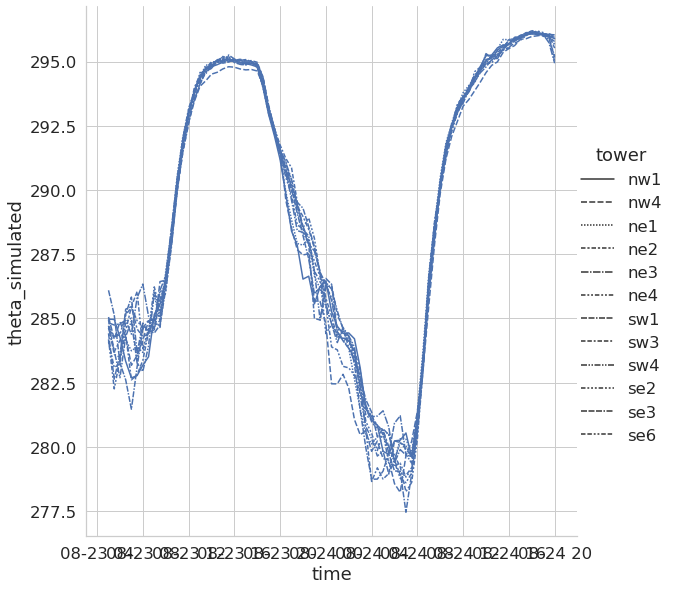

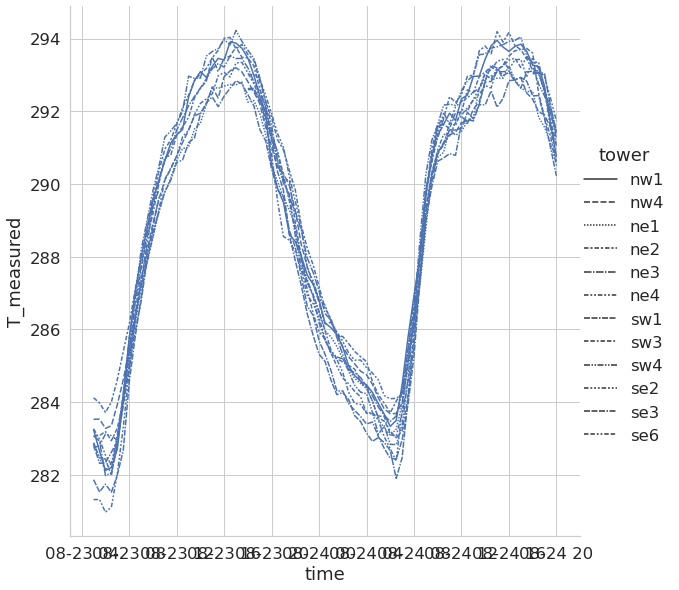

In [7]:
#check both the data
sns.relplot(
    data=temperature_df, x="time", y="theta_simulated", style="tower", kind="line",height=8
)
sns.relplot(
    data=temperature_df, x="time", y="T_measured", style="tower", kind="line",height=8
)

(275.0, 300.0)

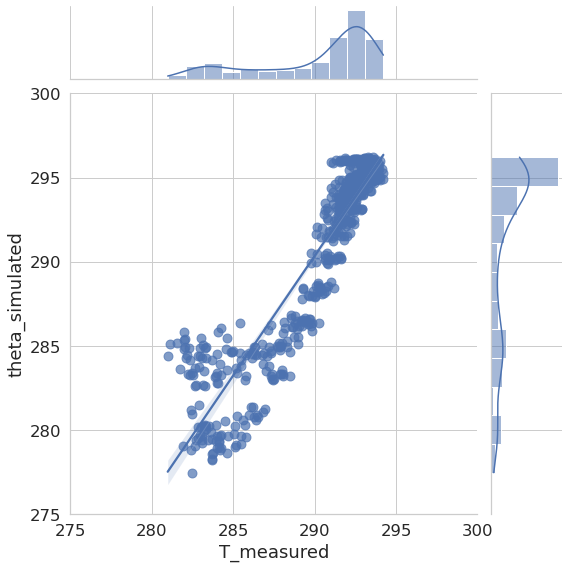

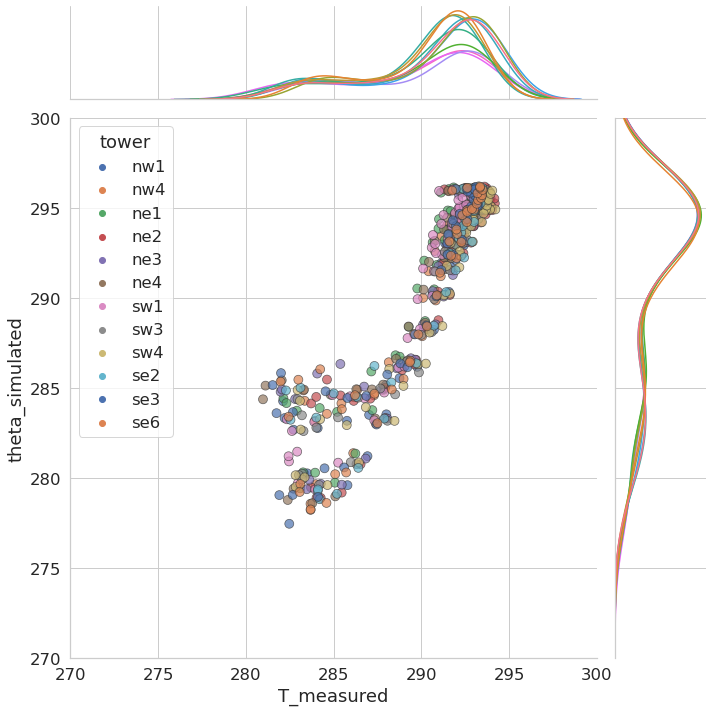

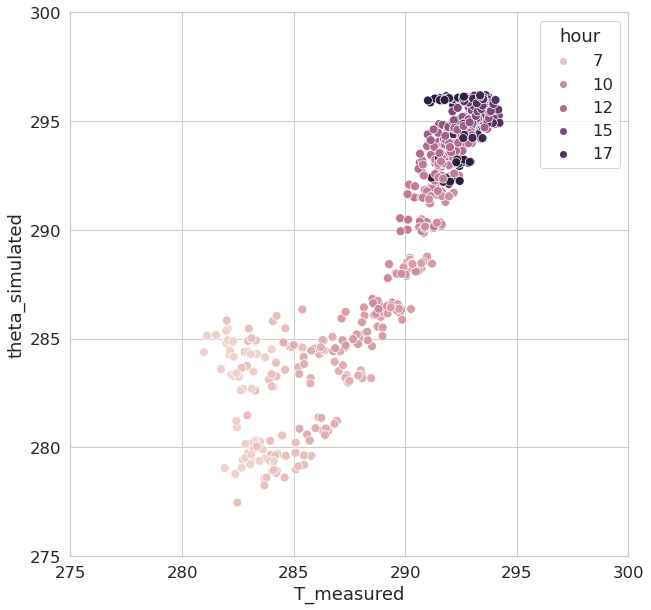

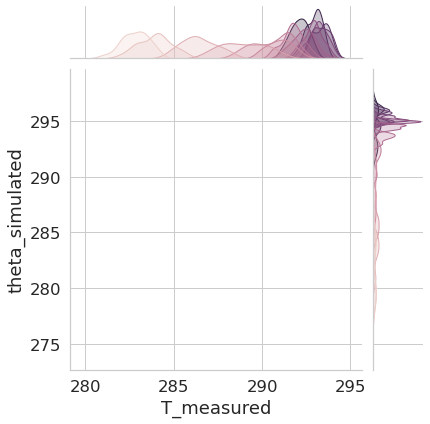

In [57]:
f1 = temperature_df['day_night']=='day'
f2 = temperature_df['day_night']=='night'


#scatter with regline and distributions
x_val = 'T_measured'
y_val = 'theta_simulated'
ax1 = sns.jointplot(data = temperature_df.loc[f1], x = x_val, y=y_val, kind='reg', xlim=(275,300), ylim=(275,300), height = 8,
                  marker = 'o',scatter_kws={'s':80,'alpha':0.7})

#scatter with towers coloured in
ax2 = sns.JointGrid(data=temperature_df.loc[f1], x=x_val, y=y_val,hue='tower',height=10,xlim=(270, 300), ylim=(270,300))
ax2.plot_joint(sns.scatterplot,edgecolor='0.2', alpha=.7,s=80,palette="deep")
ax2.plot_marginals(sns.kdeplot)

#scatter plot with time
fig, ax3 = plt.subplots(figsize=(10,10))
sns.jointplot(data = temperature_df.loc[f1], x = x_val, y=y_val, kind='scatter', hue='hour',
              marker = 'o', s = 80,ax = ax3)
ax3.set_xlim([275,300])
ax3.set_ylim([275,300])

### Moisture

In [58]:
q_df = combine_obs_sim(q_simulated,tower_data,'q','q')
q_df

tower                          time       x       y  zw_3d  q_simulated  \
0     nw1 2019-08-23 05:00:00.600000175  2217.0  9147.0   32.0     0.008546   
1     nw1 2019-08-23 05:30:00.600000192  2217.0  9147.0   32.0     0.008553   
2     nw1 2019-08-23 06:00:00.600000210  2217.0  9147.0   32.0     0.008326   
3     nw1 2019-08-23 06:30:00.600000227  2217.0  9147.0   32.0     0.008244   
4     nw1 2019-08-23 07:00:00.600000244  2217.0  9147.0   32.0     0.008231   
..    ...                           ...     ...     ...    ...          ...   
943   se6 2019-08-24 18:00:00.210999692  9537.0  3333.0   32.0     0.006203   
944   se6 2019-08-24 18:30:00.210999622  9537.0  3333.0   32.0     0.006148   
945   se6 2019-08-24 19:00:00.210999552  9537.0  3333.0   32.0     0.006344   
946   se6 2019-08-24 19:30:00.210999482  9537.0  3333.0   32.0     0.006562   
947   se6 2019-08-24 20:00:00.210999411  9537.0  3333.0   32.0     0.006640   

     q_measured  hour day_night  
0           NaN     5     night  
1           NaN     5     night  
2           NaN     6       day  
3           NaN     6       day  
4           NaN     7       day  
..          ...   ...       ...  
943   13.352215    18       day  
944   13.626987    18       day  
945   13.880861    19       day  
946   14.175860    19       day  
947   14.114041    20     night  

[948 rows x 9 columns]

In [59]:
q_df['q_simulated'] = q_df['q_simulated']*1000

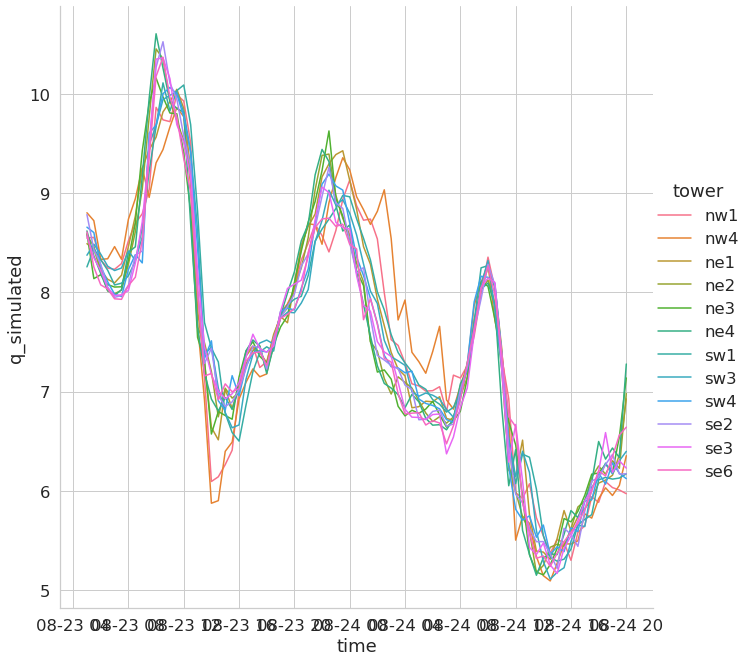

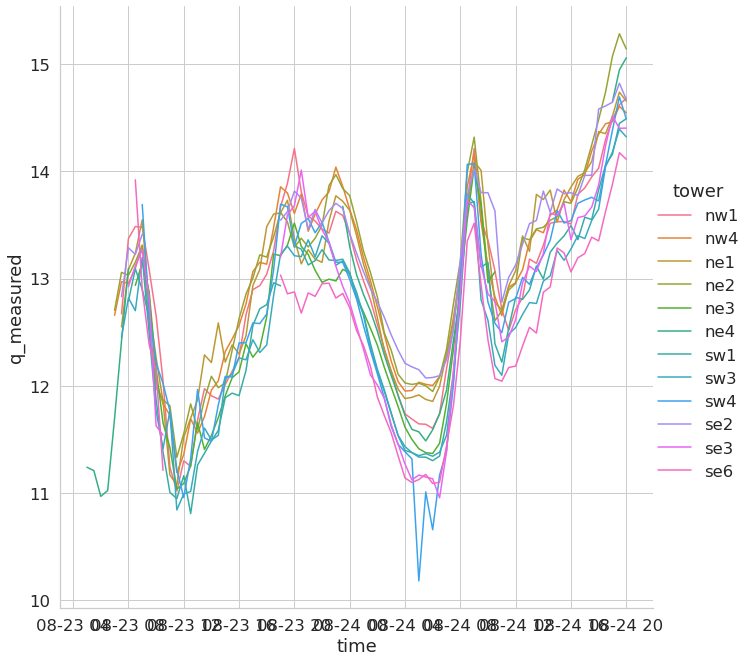

In [60]:
#check both the data
sns.relplot(
    data=q_df, x="time", y="q_simulated", hue="tower", kind="line",height=9
)
sns.relplot(
    data=q_df, x="time", y="q_measured", hue="tower", kind="line",height=9
)

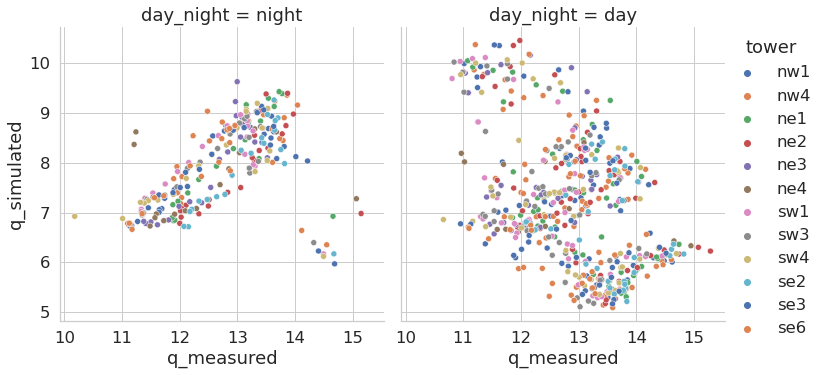

In [68]:
sns.relplot(
    data=q_df, x="q_measured", y="q_simulated", col="day_night",
    hue="tower", 
    palette='deep',
)

'\nax3.set_xlim([275,300])\nax3.set_ylim([275,300])\n'

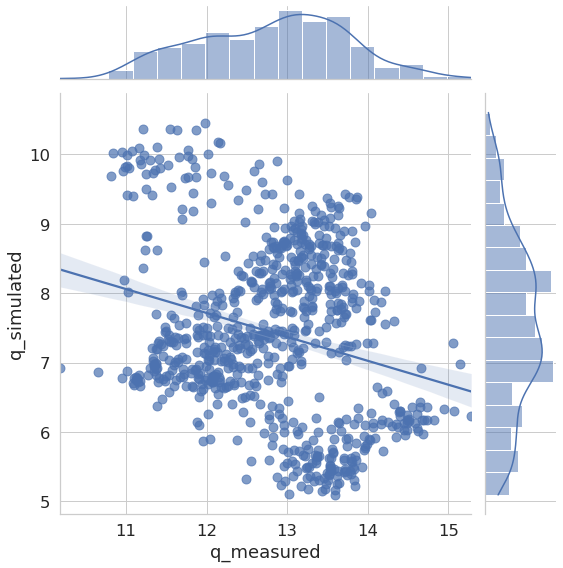

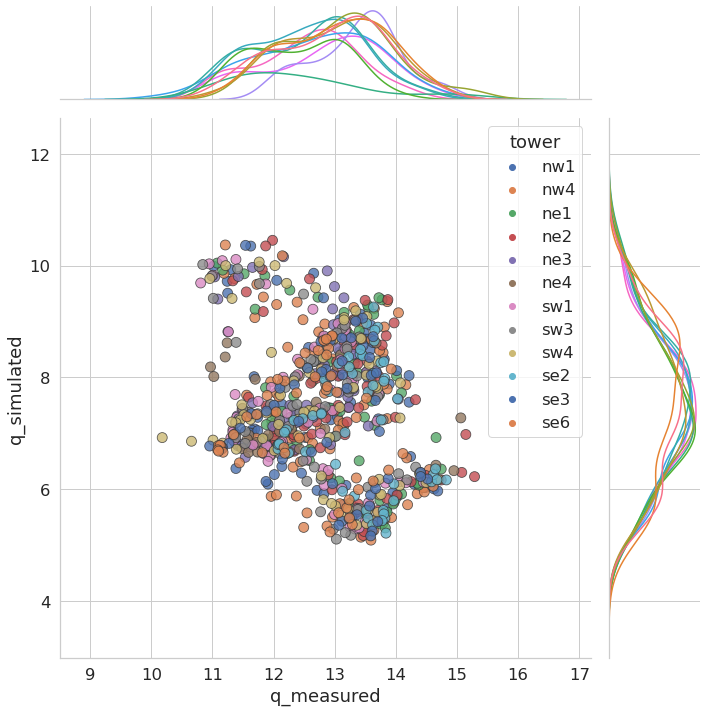

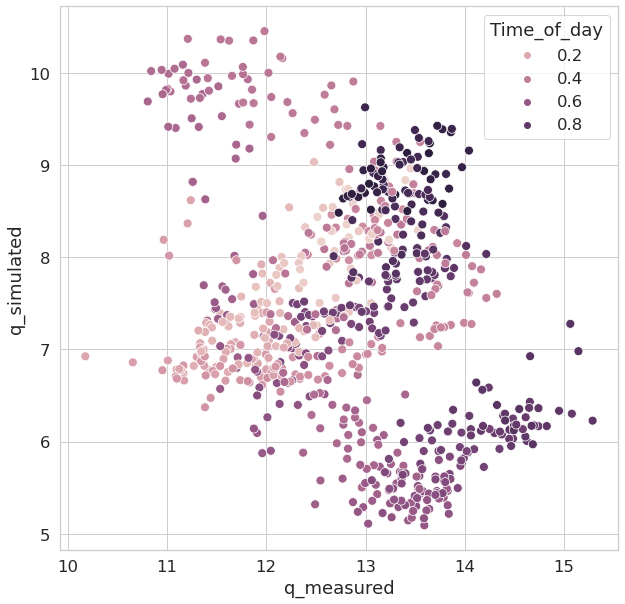

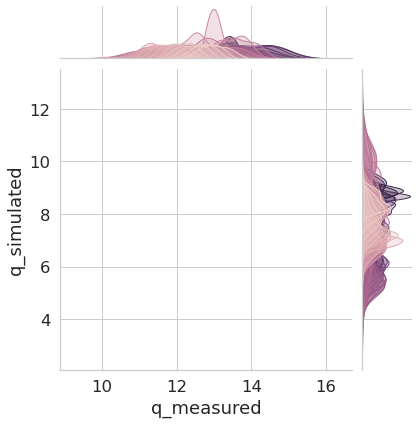

In [54]:
f1 = q_df['day_night']=='day'
f2 = q_df['day_night']=='night'

#scatter with regline and distributions
x_val = 'q_measured'
y_val = 'q_simulated'
ax1 = sns.jointplot(data = q_df, x = x_val, y=y_val, kind='reg',# xlim=(275,300), ylim=(275,300),
                    height = 8, marker = 'o',scatter_kws={'s':80,'alpha':0.7})

#scatter with towers coloured in
ax2 = sns.JointGrid(data=q_df, x=x_val, y=y_val,hue='tower',height=10)#,xlim=(270, 300), ylim=(270,300))
ax2.plot_joint(sns.scatterplot,edgecolor='0.2',alpha = 0.8,s=100,palette="deep")
ax2.plot_marginals(sns.kdeplot)

#scatter plot with time
fig, ax3 = plt.subplots(figsize=(10,10))
sns.jointplot(data = q_df, x = x_val, y=y_val, kind='scatter', hue='Time_of_day',
              marker = 'o', s = 80,ax = ax3)
'''
ax3.set_xlim([275,300])
ax3.set_ylim([275,300])
'''

<AxesSubplot:xlabel='q_measured', ylabel='Density'>

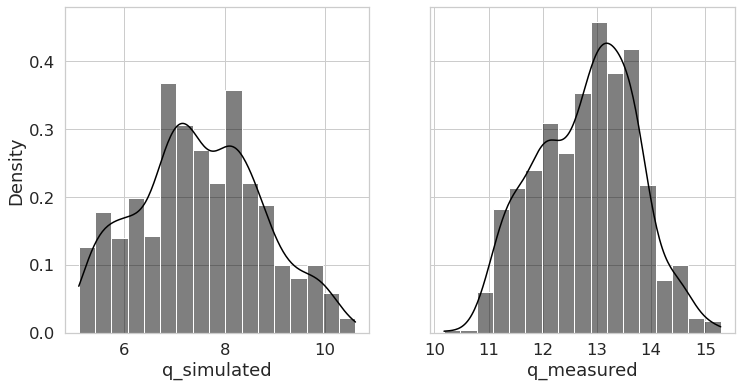

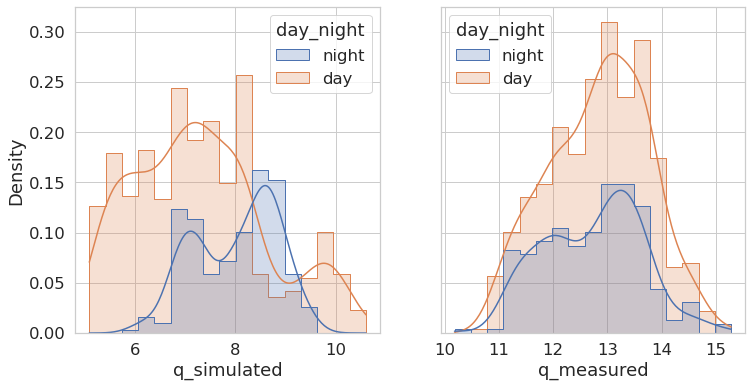

In [77]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey = True, figsize=(12,6))
sns.histplot(data = q_df, ax=ax1,x ="q_simulated", kde=True,fill=True, stat='density',color='black')
sns.histplot(data = q_df, ax=ax2,x ="q_measured", kde=True,fill=True, stat='density',color='black')
fig, (ax1,ax2) = plt.subplots(1,2,sharey = True, figsize=(12,6))
sns.histplot(data = q_df,x ="q_simulated", ax=ax1, hue = 'day_night',kde=True,fill=True, stat='density',element='step')
sns.histplot(data = q_df,x ="q_measured", ax=ax2, hue = 'day_night',kde=True,fill=True, stat='density',element='step')


<AxesSubplot:xlabel='T_measured', ylabel='Density'>

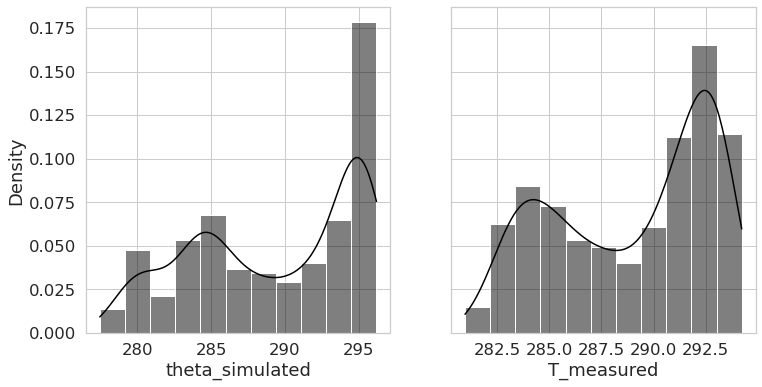

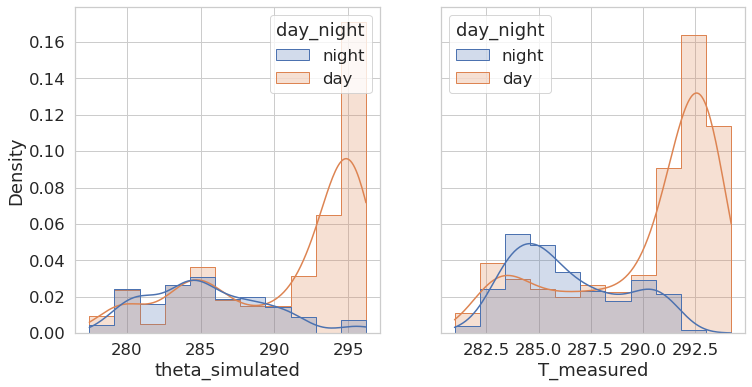

In [78]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey = True, figsize=(12,6))
sns.histplot(data = temperature_df, ax=ax1,x ="theta_simulated", kde=True,fill=True, stat='density',color='black')
sns.histplot(data = temperature_df, ax=ax2,x ="T_measured", kde=True,fill=True, stat='density',color='black')
fig, (ax1,ax2) = plt.subplots(1,2,sharey = True, figsize=(12,6))
sns.histplot(data = temperature_df,x ="theta_simulated", ax=ax1, hue = 'day_night',kde=True,fill=True, stat='density',element='step')
sns.histplot(data = temperature_df,x ="T_measured", ax=ax2, hue = 'day_night',kde=True,fill=True, stat='density',element='step')


### Heat flux


In [56]:
wtheta_df = combine_obs_sim(wtheta_simulated,tower_data,'wtheta','cov_wT')
wtheta_df

x       y  zw_3d  wtheta_simulated  \
tower time                                                                     
nw1   2019-08-23 05:00:00.600000175  2217.0  9147.0   32.0         -0.002164   
      2019-08-23 05:30:00.600000192  2217.0  9147.0   32.0         -0.003089   
      2019-08-23 06:00:00.600000210  2217.0  9147.0   32.0         -0.004218   
      2019-08-23 06:30:00.600000227  2217.0  9147.0   32.0          0.002145   
      2019-08-23 07:00:00.600000244  2217.0  9147.0   32.0          0.010347   
...                                     ...     ...    ...               ...   
se6   2019-08-24 18:00:00.210999692  9537.0  3333.0   32.0          0.031190   
      2019-08-24 18:30:00.210999622  9537.0  3333.0   32.0          0.006935   
      2019-08-24 19:00:00.210999552  9537.0  3333.0   32.0          0.000599   
      2019-08-24 19:30:00.210999482  9537.0  3333.0   32.0          0.000725   
      2019-08-24 20:00:00.210999411  9537.0  3333.0   32.0          0.000832   

                                     cov_wT_measured         DOY  Time_of_day  
tower time                                                                     
nw1   2019-08-23 05:00:00.600000175              NaN  235.208333     0.208333  
      2019-08-23 05:30:00.600000192              NaN  235.229167     0.229167  
      2019-08-23 06:00:00.600000210              NaN  235.250000     0.250000  
      2019-08-23 06:30:00.600000227              NaN  235.270833     0.270833  
      2019-08-23 07:00:00.600000244        -0.000788  235.291667     0.291667  
...                                              ...         ...          ...  
se6   2019-08-24 18:00:00.210999692         0.010077  236.750000     0.750000  
      2019-08-24 18:30:00.210999622        -0.002774  236.770833     0.770833  
      2019-08-24 19:00:00.210999552        -0.009599  236.791667     0.791667  
      2019-08-24 19:30:00.210999482        -0.014315  236.812500     0.812500  
      2019-08-24 20:00:00.210999411        -0.022617  236.833333     0.833333  

[948 rows x 7 columns]

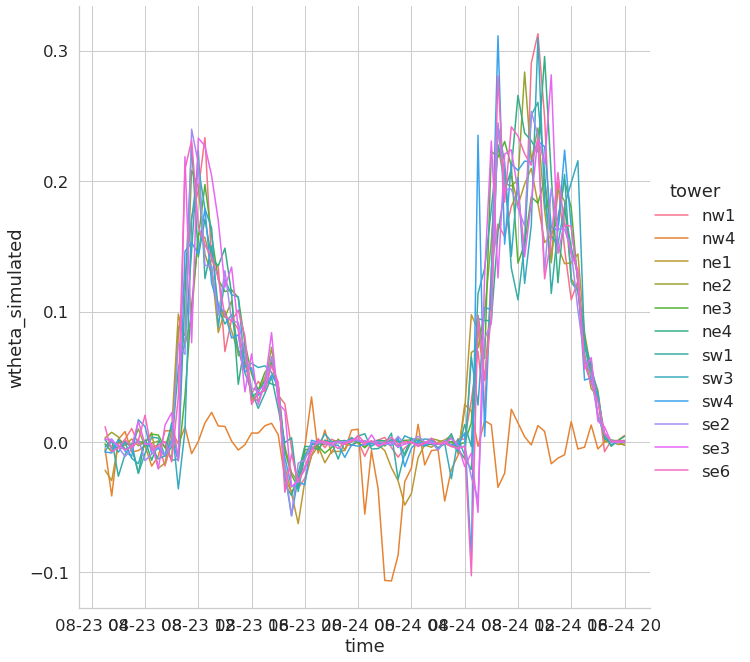

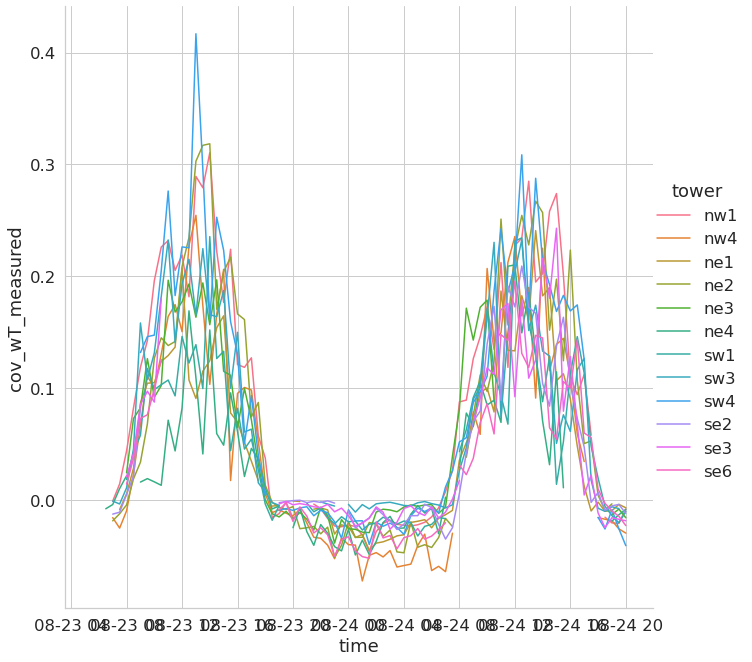

In [58]:
#check both the data
sns.relplot(
    data=wtheta_df, x="time", y="wtheta_simulated", hue="tower", kind="line",height=9
)
sns.relplot(
    data=wtheta_df, x="time", y="cov_wT_measured", hue="tower", kind="line",height=9
)

'\nax3.set_xlim([275,300])\nax3.set_ylim([275,300])\n'

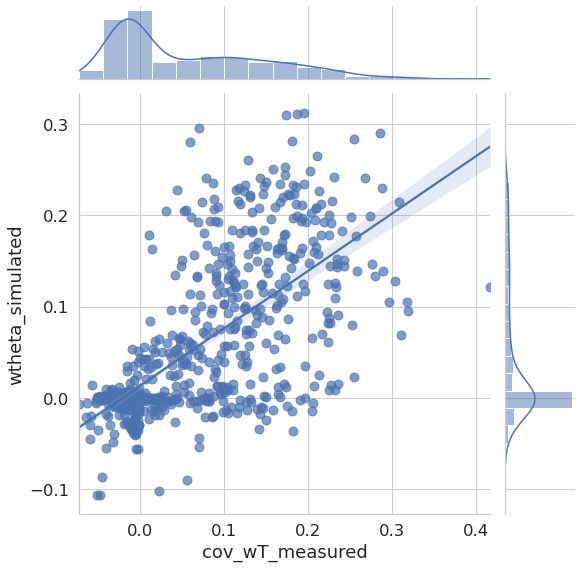

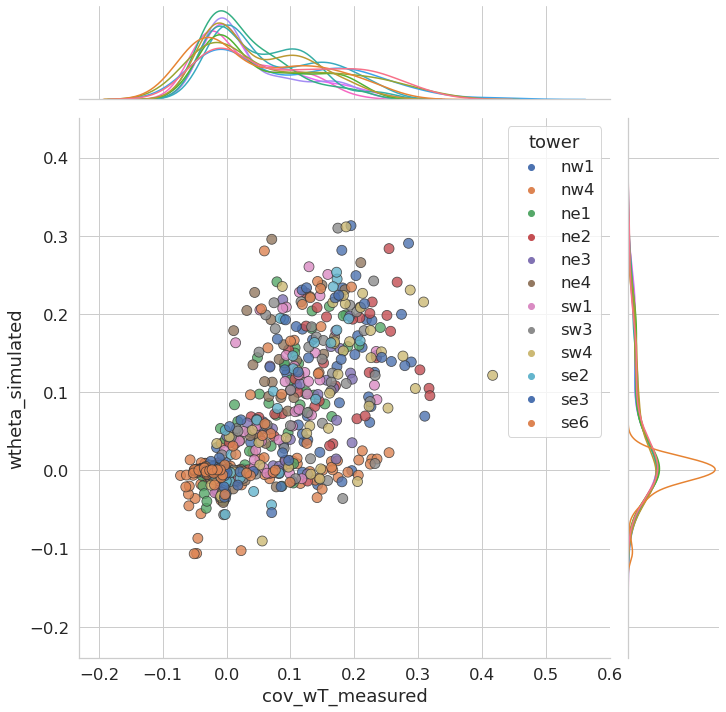

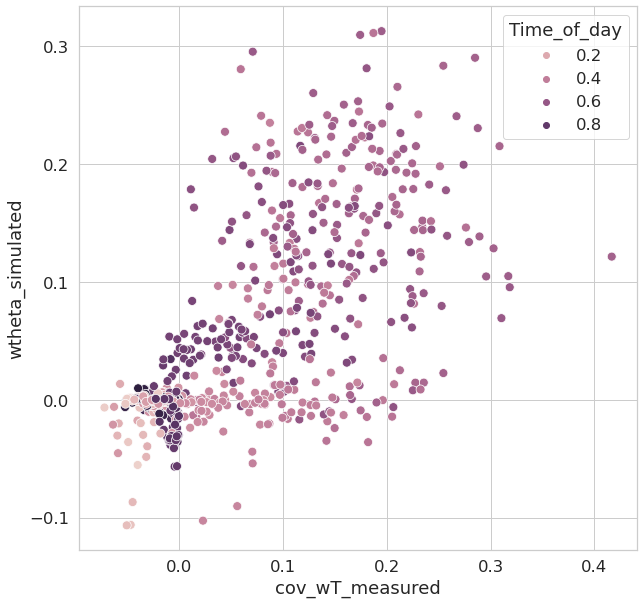

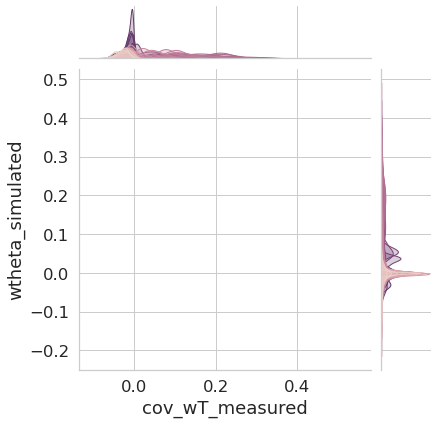

In [59]:
#scatter with regline and distributions
x_val = 'cov_wT_measured'
y_val = 'wtheta_simulated'
ax1 = sns.jointplot(data = wtheta_df, x = x_val, y=y_val, kind='reg',# xlim=(275,300), ylim=(275,300),
                    height = 8, marker = 'o',scatter_kws={'s':80,'alpha':0.7})

#scatter with towers coloured in
ax2 = sns.JointGrid(data=wtheta_df, x=x_val, y=y_val,hue='tower',height=10)#,xlim=(270, 300), ylim=(270,300))
ax2.plot_joint(sns.scatterplot,edgecolor='0.2',alpha = 0.8,s=100,palette="deep")
ax2.plot_marginals(sns.kdeplot)

#scatter plot with time
fig, ax3 = plt.subplots(figsize=(10,10))
sns.jointplot(data = wtheta_df, x = x_val, y=y_val, kind='scatter', hue='Time_of_day',
              marker = 'o', s = 80,ax = ax3)
'''
ax3.set_xlim([275,300])
ax3.set_ylim([275,300])
'''

Change the T_measured values correctly.

In [94]:
# #save the subset
#wtheta_simulated.to_netcdf('/bog/incoming/CHEESEHEAD/palm/realistic_runs/python_scripts/spaleri/work/wtheta_simulated_IOP2_v2.nc')
#wq_simulated.to_netcdf('/bog/incoming/CHEESEHEAD/palm/realistic_runs/python_scripts/spaleri/work/wq_simulated_v2.nc')
#theta_simulated.to_netcdf('/bog/incoming/CHEESEHEAD/palm/realistic_runs/python_scripts/spaleri/work/theta_simulated_v2.nc')
#q_simulated.to_netcdf('/bog/incoming/CHEESEHEAD/palm/realistic_runs/python_scripts/spaleri/work/q_simulated_v2.nc')


In [27]:
pwd()

'/bog/incoming/CHEESEHEAD/palm/realistic_runs/python_scripts/spaleri'

In [6]:
#using data from ensemble.member.1
#open all the folders inside and read data from DATA_MASK_NETCDF_N03_M01_slice
#skip if not found.

In [28]:
file_name = 'DATA_MASK_NETCDF_N03_M01slice'
source_folder = '/bog/incoming/CHEESEHEAD/palm/realistic_runs/ches_IOP2/ensemble.member.1'

#get list of all the sub-folders, pertaining to different runs
folder_list = os.listdir(source_folder)

print ('Folder list: ')
simulated_WLEF_data_list = []
#read in the files from the folders and create a list of them 
for i, folder in enumerate(folder_list):
    file = source_folder + '/' + folder + '/' + file_name
    #check if file exists
    if os.path.exists(file):
        print(folder)
        ds = xr.open_dataset(file)
        ds.close()
        #append the data to the list
        simulated_WLEF_data_list.append(ds)
        

#concatenate the list into one dataset and sort it by time 
simulated_WLEF_ds = xr.concat(simulated_WLEF_data_list, dim='time')
simulated_WLEF_ds = simulated_WLEF_ds.sortby('time')

Folder list: 
06.ches_IOP2.31028
04.ches_IOP2.20941
05.ches_IOP2.13864
07.ches_IOP2.19931
08.ches_IOP2.19743
02.ches_IOP2.10023
03.ches_IOP2.28390


In [29]:
simulated_WLEF_ds['time'] = pd.to_datetime('2019-08-23') + simulated_WLEF_ds['time'].values


In [30]:
simulated_WLEF_ds

<xarray.Dataset>
Dimensions:  (time: 234001, x: 3, xu: 3, y: 3, yv: 3, zu_3d: 9, zw_3d: 9)
Coordinates:
  * x        (x) float64 6.069e+03 6.075e+03 6.081e+03
  * y        (y) float64 6.177e+03 6.183e+03 6.189e+03
  * xu       (xu) float64 6.066e+03 6.072e+03 6.078e+03
  * yv       (yv) float64 6.174e+03 6.18e+03 6.186e+03
  * time     (time) datetime64[ns] 2019-08-23T05:00:00.000000175 ... 2019-08-...
  * zu_3d    (zu_3d) float64 26.0 30.0 34.0 94.0 98.0 102.0 194.0 198.0 202.0
  * zw_3d    (zw_3d) float64 28.0 32.0 36.0 96.0 100.0 104.0 196.0 200.0 204.0
Data variables:
    E_UTM    (time, x) float64 4.989e+05 4.989e+05 ... 4.989e+05 4.989e+05
    N_UTM    (time, y) float64 6.082e+05 6.082e+05 ... 6.082e+05 6.082e+05
    Eu_UTM   (time, xu) float64 4.989e+05 4.989e+05 ... 4.989e+05 4.989e+05
    Nu_UTM   (time, y) float64 6.082e+05 6.082e+05 ... 6.082e+05 6.082e+05
    Ev_UTM   (time, x) float64 4.989e+05 4.989e+05 ... 4.989e+05 4.989e+05
    Nv_UTM   (time, yv) float64 6.081e+05 6.082e+05 ... 6.082e+05 6.082e+05
    lon      (time, y, x) float64 -93.01 -93.01 -93.01 ... -93.01 -93.01 -93.01
    lat      (time, y, x) float64 5.502 5.502 5.502 5.502 ... 5.502 5.502 5.502
    lonu     (time, y, xu) float64 -93.01 -93.01 -93.01 ... -93.01 -93.01 -93.01
    latu     (time, y, xu) float64 5.502 5.502 5.502 5.502 ... 5.502 5.502 5.502
    lonv     (time, yv, x) float64 -93.01 -93.01 -93.01 ... -93.01 -93.01 -93.01
    latv     (time, yv, x) float64 5.502 5.502 5.502 5.502 ... 5.502 5.502 5.502
    crs      (time) int32 -2147483647 -2147483647 ... -2147483647 -2147483647
    u        (time, zu_3d, y, xu) float32 -1.0559956 -1.0432243 ... -0.07362391
    v        (time, zu_3d, yv, x) float32 -0.8337311 -0.80854285 ... -0.35641006
    w        (time, zw_3d, y, x) float32 0.07919971 0.068178974 ... -0.31850612
    theta    (time, zu_3d, y, x) float32 283.39307 283.4112 ... 296.09335
    q        (time, zu_3d, y, x) float32 0.008521782 0.008525057 ... 0.00599272
    s        (time, zu_3d, y, x) float32 438.24213 438.22574 ... 408.302
Attributes:
    title:           PALM 21.10-rc.2  run: ches_IOP2.06  nest-id: 03  host: b...
    Conventions:     CF-1.7
    creation_time:   2022-06-22 12:28:01 -06
    data_content:    podsmasked
    version:         7
    origin_time:     2019-08-22 05:00:00 +00
    origin_lat:      45.710569
    origin_lon:      -90.5842512
    origin_x:        492825.33
    origin_y:        601975.59
    origin_z:        470.0
    rotation_angle:  0.0
    dependencies:    
    history:         
    author:          Luise Wanner, luise.wanner at kit.edu, Sreenath Paleri, ...
    contact_person:  
    institution:     IMK-IFU,Karlsruhe Institute of Technology, AOSS UW Madison
    acronym:         
    campaign:        
    location:        
    site:            
    source:          PALM 21.10-rc.2
    references:      
    keywords:        example, PALM-4U
    licence:         
    comment:         Generic crossing example
    VAR_LIST:        ;u;v;w;theta;q;s;

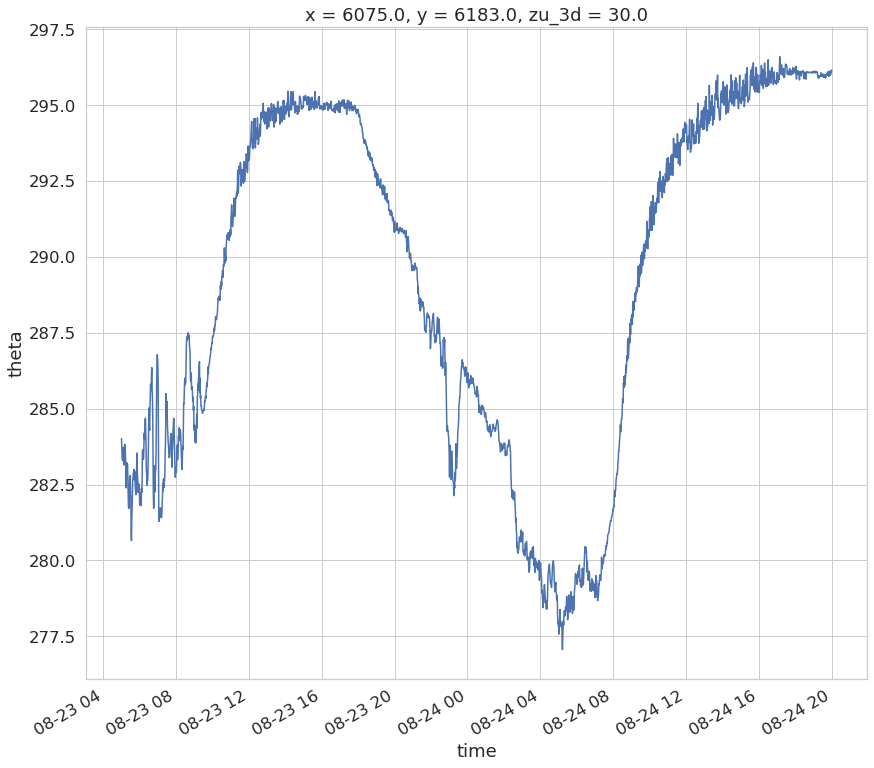

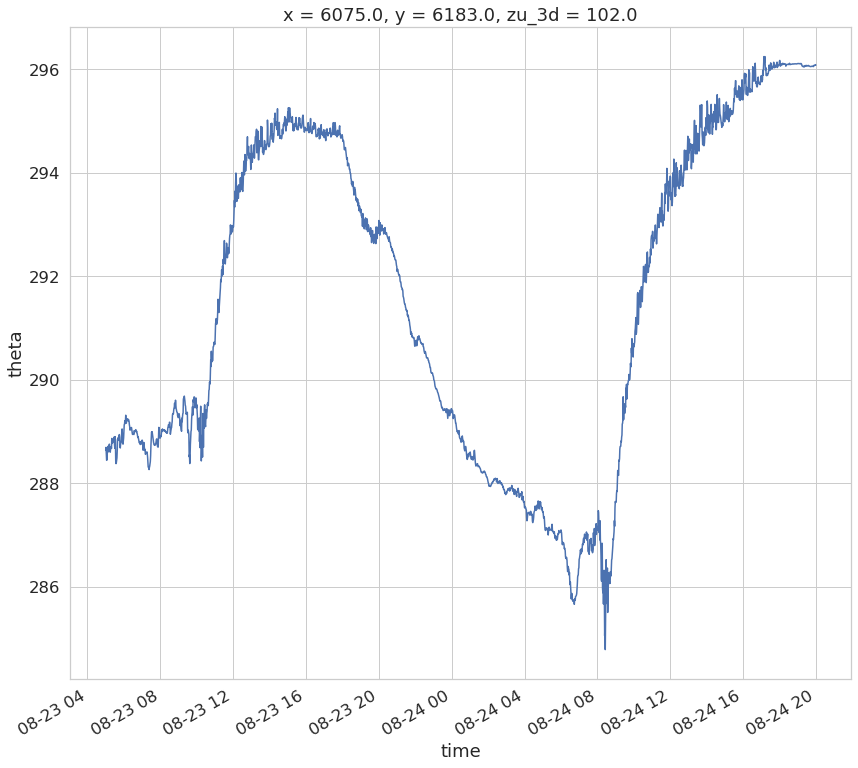

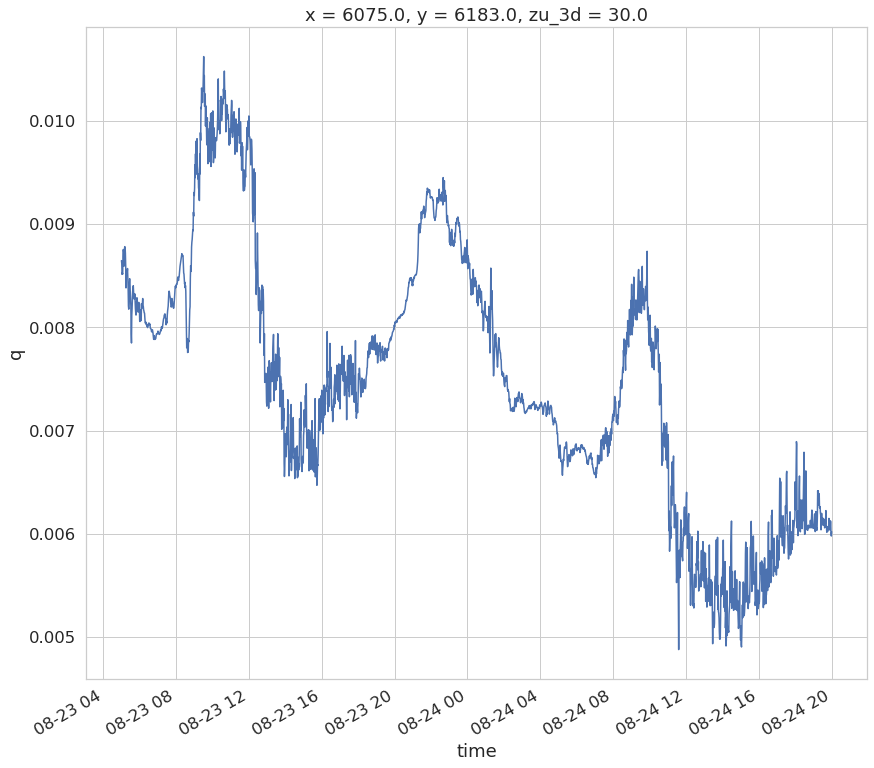

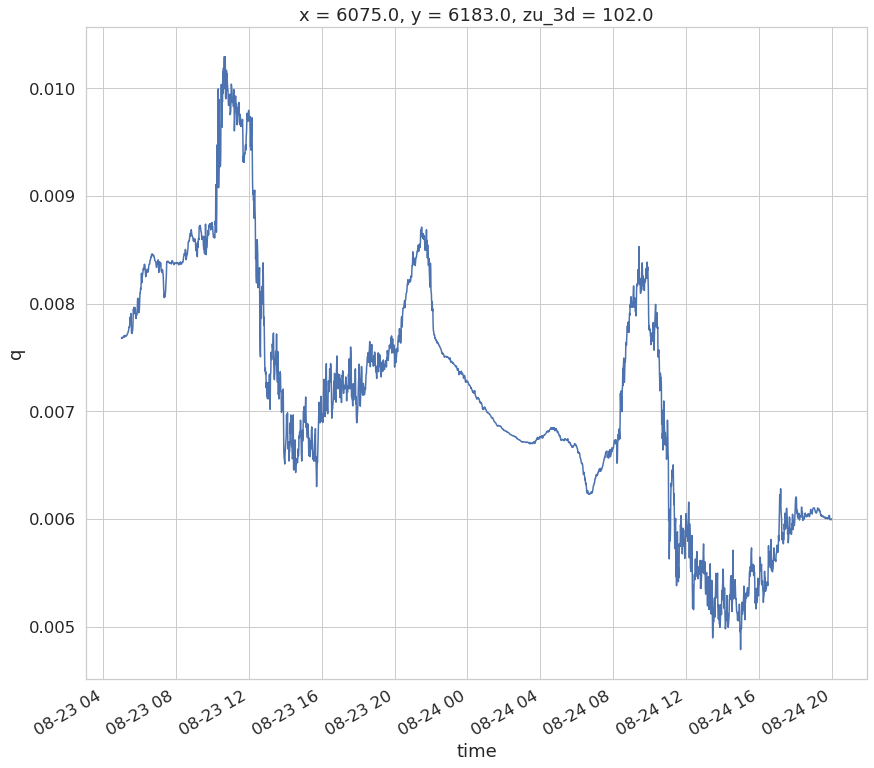

In [31]:
#check the T, q time series at 30, 122 and 396 m
simulated_WLEF_ds.theta.sel(zu_3d=30,x=6075,y=6183).resample(time = '1min').mean().plot(figsize = (14,12))
simulated_WLEF_ds.theta.sel(zu_3d=102,x=6075,y=6183).resample(time = '1min').mean().plot(figsize = (14,12))

simulated_WLEF_ds.q.sel(zu_3d=30,x=6075,y=6183).resample(time = '1min').mean().plot(figsize = (14,12))
simulated_WLEF_ds.q.sel(zu_3d=102,x=6075,y=6183).resample(time = '1min').mean().plot(figsize = (14,12))


In [9]:
#Plotting wind data
#have to extrapolate u, v to w grid.

#read in variables to data arrays, renaming the coords for theta and q to interpolate
w = simulated_WLEF_ds.w.sel(zw_3d=32,x=6075,y=6183).resample(time = '1min').mean()
u_interpolated = simulated_WLEF_ds.u.sel(zu_3d=30,xu=6072,y=6183).resample(time = '1min').mean().rename({'zu_3d': 'zw_3d'}).interp_like(w)
v_interpolated = simulated_WLEF_ds.v.sel(zu_3d=30,x=6075,yv=6180).resample(time = '1min').mean().rename({'zu_3d': 'zw_3d'}).interp_like(w)
wind = np.sqrt(w**2 + u_interpolated**2 + v_interpolated**2 )
#change the time coordinate to datetime format , starting at 2019-09-24
#if you find a timedelta, datatype, just add the date to it and then continue using it. 
#https://stackoverflow.com/questions/62572678/xarray-coords-conversion-to-datetime64
#https://stackoverflow.com/questions/17978092/combine-date-and-time-columns-using-python-pandas/50352414#50352414



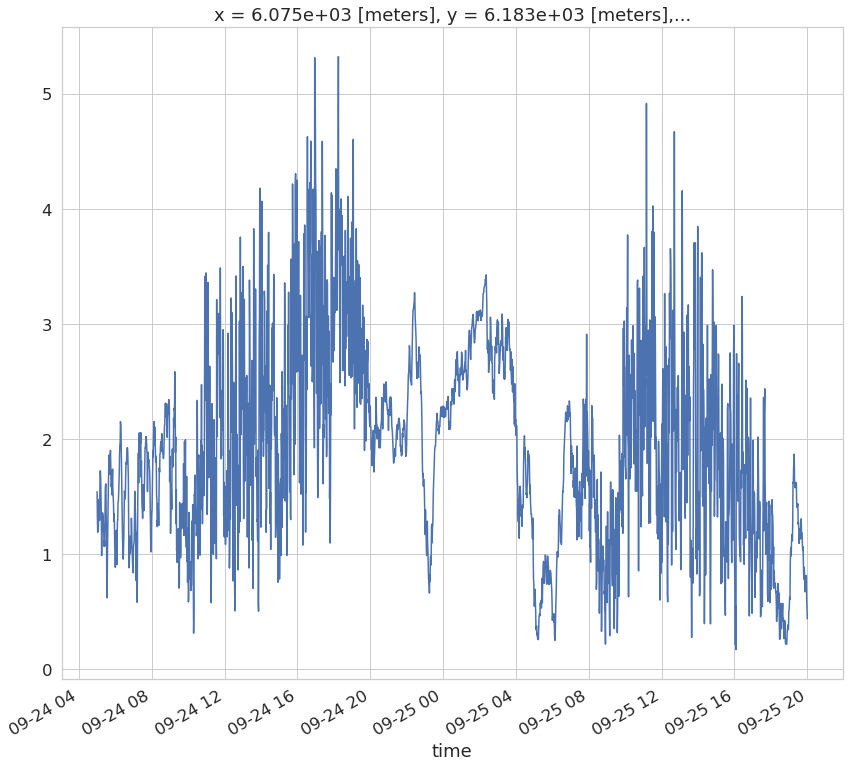

In [14]:
wind.plot(figsize = (14,12))

Notes: Rain event 24th night/evening/ 
Simulations show moisture advection and calm winds??
Interpolated u,v to the w grid. But u and v are offset in the horizontal to w by 3 m :( 
Simulated tower data at 100m, actual tower at 122m :( 

In [9]:
#Trying to extract and plot the 1 minute data from the tall tower for these three fields. 

In [15]:
#define the variable names needed
varNames=['hh','mm','ss','ws30','wsSTD30','wd30','wdSTD30','T30','RH30','q30','ws122','wsSTD122','wd122','wdSTD122','T122','RH122','q122','ws396','wsSTD396','wd396','wdSTD396','T396','RH396','q396','SFCPres','precip','PAR']
# function to read in the variables from a local .txt file, with name filename
# and return a pandas dataframe with the variables in it
# written by Jonathan thom
def readWLEFSlow(filename):
    lines=open(filename,'rt').readlines()

    stamp=[]
    L=[]
    # create an array to write the data with the correct number of columns
    data_only_var_name=varNames[3:]
    for i in range(len(varNames[3:])):
            L.append([])
    print(len(L))
    for j,line in enumerate(lines):
     #   print('line number= ',j)
        line=line.replace('\n','')
        valStr=line.split()
#  make a timestamp from filename and time in the file
        # get filename
        YYYYMMDD=os.path.split(filename)[1][0:8]
        YYYYMMDD=datetime.strptime(YYYYMMDD,'%Y%m%d')
        if valStr[0]=='24':
            valStr[0]='00'
            YYYYMMDD=YYYYMMDD + timedelta(days=1)
        YYYYMMDD=YYYYMMDD.replace(hour=int(valStr[0]))
        YYYYMMDD=YYYYMMDD.replace(minute=int(valStr[1]))
        YYYYMMDD=YYYYMMDD.replace(second=int(valStr[2]))
        stamp.append(YYYYMMDD)
    
        data_only=valStr[3:]
        if len(data_only)<len(data_only_var_name):
            print('short :',len(data_only),j,line)
            for i in range(len(data_only),len(varNames[3:])):
                data_only.append('nan')
        for i,v in enumerate(data_only):
            try:
                dataval=float(v)
            except ValueError:
                dataval=float('nan')
            print(i,v)
            L[i].append(dataval)
    Lnp=np.array(L)
    Lnp=np.transpose(Lnp)
    stampIDX=pd.DatetimeIndex(stamp)
    records=pd.DataFrame(Lnp,index=stampIDX,columns=data_only_var_name)

    return records

In [17]:
#WLEF_20190924_df = readWLEFSlow('/air/incoming/wlef/slow/2019/20190924_towerslow.txt')
#WLEF_20190925_df = readWLEFSlow('/air/incoming/wlef/slow/2019/20190925_towerslow.txt')
#WLEF_20190926_df = readWLEFSlow('/air/incoming/wlef/slow/2019/20190926_towerslow.txt')

In [18]:
WLEF_20190924_df

ws30  wsSTD30    wd30  wdSTD30     T30    RH30     q30  \
2019-09-24 00:00:00    1.74     0.21  250.67     6.97   17.60   60.05    7.94   
2019-09-24 00:01:00    1.43     0.23  245.86     8.79   17.57   60.24    7.95   
2019-09-24 00:02:00    1.47     0.21  247.24     8.24   17.54   60.37    7.96   
2019-09-24 00:03:00    1.53     0.31  252.22     5.67   17.48   60.92    8.00   
2019-09-24 00:04:00    1.49     0.26  248.44     6.26   17.41   60.97    7.97   
...                     ...      ...     ...      ...     ...     ...     ...   
2019-09-24 23:55:00 -999.00  -999.00 -999.00  -999.00   21.24   76.71   12.98   
2019-09-24 23:56:00 -999.00  -999.00 -999.00  -999.00   21.20   76.63   12.94   
2019-09-24 23:57:00 -999.00  -999.00 -999.00  -999.00   21.19   76.70   12.94   
2019-09-24 23:58:00 -999.00  -999.00 -999.00  -999.00   21.19   76.86   12.97   
2019-09-24 23:59:00 -999.00  -999.00 -999.00  -999.00 -999.00 -999.00 -999.00   

                      ws122  wsSTD122   wd122  ...   ws396  wsSTD396   wd396  \
2019-09-24 00:00:00    6.41      0.13  266.82  ...    8.66      0.15  270.20   
2019-09-24 00:01:00    6.34      0.25  264.77  ...    8.80      0.15  270.25   
2019-09-24 00:02:00    6.44      0.29  264.66  ...    8.49      0.20  271.00   
2019-09-24 00:03:00    6.67      0.22  266.08  ...    8.04      0.17  269.08   
2019-09-24 00:04:00    6.76      0.12  266.08  ...    8.30      0.22  270.94   
...                     ...       ...     ...  ...     ...       ...     ...   
2019-09-24 23:55:00 -999.00   -999.00 -999.00  ... -999.00   -999.00 -999.00   
2019-09-24 23:56:00 -999.00   -999.00 -999.00  ... -999.00   -999.00 -999.00   
2019-09-24 23:57:00 -999.00   -999.00 -999.00  ... -999.00   -999.00 -999.00   
2019-09-24 23:58:00 -999.00   -999.00 -999.00  ... -999.00   -999.00 -999.00   
2019-09-24 23:59:00 -999.00   -999.00 -999.00  ... -999.00   -999.00 -999.00   

                     wdSTD396    T396   RH396    q396  SFCPres  precip     PAR  
2019-09-24 00:00:00      0.56   15.79   57.19    6.73    95.77     0.0    5.17  
2019-09-24 00:01:00      1.09   15.79   57.39    6.75    95.77     0.0    4.44  
2019-09-24 00:02:00      0.95   15.79   57.59    6.78    95.77     0.0    3.76  
2019-09-24 00:03:00      1.45   15.79   57.73    6.79    95.78     0.0    3.06  
2019-09-24 00:04:00      1.37   15.79   57.88    6.81    95.78     0.0    2.45  
...                       ...     ...     ...     ...      ...     ...     ...  
2019-09-24 23:55:00   -999.00   19.31   79.57   11.93    94.65     0.0    2.99  
2019-09-24 23:56:00   -999.00   19.31   79.66   11.95    94.64     0.0    2.72  
2019-09-24 23:57:00   -999.00   19.31   79.71   11.95    94.64     0.0    2.40  
2019-09-24 23:58:00   -999.00   19.31   79.75   11.96    94.63     0.0    2.11  
2019-09-24 23:59:00   -999.00 -999.00 -999.00 -999.00  -999.00  -999.0 -999.00  

[1440 rows x 24 columns]

In [46]:
WLEF_df = pd.DataFrame()
WLEF_df = pd.concat([WLEF_20190924_df,WLEF_20190925_df,WLEF_20190926_df])['2019-09-24 05:00:00' :'2019-09-26 05:00:00']
#change the timestamp fro UTC to CDT
WLEF_df['Timestamp'] = (WLEF_df.index + pd.Timedelta(-5, "h"))
#WLEF_df['Timestamp']
WLEF_df WLEF_df.set_index('Timestamp')
WLEF_df

ws30  wsSTD30    wd30  wdSTD30    T30   RH30   q30  \
2019-09-24 05:00:00  2.53     0.35  223.11     7.12  12.46  82.10  7.80   
2019-09-24 05:01:00  2.28     0.51  222.09     7.41  12.48  81.90  7.79   
2019-09-24 05:02:00  2.24     0.50  225.87     7.84  12.55  81.60  7.80   
2019-09-24 05:03:00  2.08     0.54  226.14     8.71  12.59  81.50  7.81   
2019-09-24 05:04:00  2.02     0.31  222.46     7.22  12.58  81.60  7.81   
...                   ...      ...     ...      ...    ...    ...   ...   
2019-09-26 04:56:00  2.88     0.76  270.15    14.76   9.57  72.34  5.68   
2019-09-26 04:57:00  3.30     0.65  277.63    12.01   9.57  72.63  5.71   
2019-09-26 04:58:00  2.68     0.53  275.87    12.52   9.54  72.69  5.70   
2019-09-26 04:59:00  3.03     0.82  281.42    14.56   9.54  72.62  5.69   
2019-09-26 05:00:00  2.99     0.99  267.06    15.81   9.51  72.84  5.70   

                      ws122  wsSTD122   wd122  ...  wsSTD396   wd396  \
2019-09-24 05:00:00    9.99      0.06  257.23  ...      0.02  264.51   
2019-09-24 05:01:00   10.02      0.12  257.85  ...      0.02  264.70   
2019-09-24 05:02:00    9.88      0.09  257.72  ...      0.04  265.11   
2019-09-24 05:03:00    9.55      0.13  255.64  ...      0.02  265.59   
2019-09-24 05:04:00    9.21      0.14  253.02  ...      0.03  266.15   
...                     ...       ...     ...  ...       ...     ...   
2019-09-26 04:56:00 -999.00   -999.00 -999.00  ...      0.20  295.05   
2019-09-26 04:57:00 -999.00   -999.00 -999.00  ...      0.18  295.22   
2019-09-26 04:58:00 -999.00   -999.00 -999.00  ...      0.10  294.42   
2019-09-26 04:59:00 -999.00   -999.00 -999.00  ...      0.12  294.93   
2019-09-26 05:00:00 -999.00   -999.00 -999.00  ...      0.11  294.60   

                     wdSTD396   T396  RH396  q396  SFCPres  precip   PAR  \
2019-09-24 05:00:00      0.07  15.88  53.50  6.33    95.77     0.0  0.00   
2019-09-24 05:01:00      0.11  15.88  53.46  6.32    95.77     0.0  0.01   
2019-09-24 05:02:00      0.14  15.88  53.43  6.32    95.77     0.0  0.06   
2019-09-24 05:03:00      0.17  15.89  53.36  6.32    95.77     0.0  0.11   
2019-09-24 05:04:00      0.15  15.93  53.31  6.33    95.77     0.0  0.12   
...                       ...    ...    ...   ...      ...     ...   ...   
2019-09-26 04:56:00      0.64   8.21  65.51  4.69    95.27     0.0  0.11   
2019-09-26 04:57:00      0.51   8.22  65.25  4.67    95.27     0.0  0.10   
2019-09-26 04:58:00      0.50   8.28  64.84  4.66    95.27     0.0  0.11   
2019-09-26 04:59:00      0.53   8.31  65.11  4.69    95.27     0.0  0.09   
2019-09-26 05:00:00      0.48   8.31  65.32  4.71    95.27     0.0  0.09   

                              Timestamp  
2019-09-24 05:00:00 2019-09-24 00:00:00  
2019-09-24 05:01:00 2019-09-24 00:01:00  
2019-09-24 05:02:00 2019-09-24 00:02:00  
2019-09-24 05:03:00 2019-09-24 00:03:00  
2019-09-24 05:04:00 2019-09-24 00:04:00  
...                                 ...  
2019-09-26 04:56:00 2019-09-25 23:56:00  
2019-09-26 04:57:00 2019-09-25 23:57:00  
2019-09-26 04:58:00 2019-09-25 23:58:00  
2019-09-26 04:59:00 2019-09-25 23:59:00  
2019-09-26 05:00:00 2019-09-26 00:00:00  

[2881 rows x 25 columns]

In [41]:
WLEF_ws30_df_nan = WLEF_df['ws30'].copy()
WLEF_ws30_df_nan[WLEF_ws30_df_nan<-100]=np.nan

WLEF_T30_df_nan = WLEF_df['T30'].copy()
WLEF_T30_df_nan[WLEF_T30_df_nan<-100]=np.nan

WLEF_q30_df_nan = WLEF_df['q30'].copy()
WLEF_q30_df_nan[WLEF_q30_df_nan<-100]=np.nan

<AxesSubplot:>

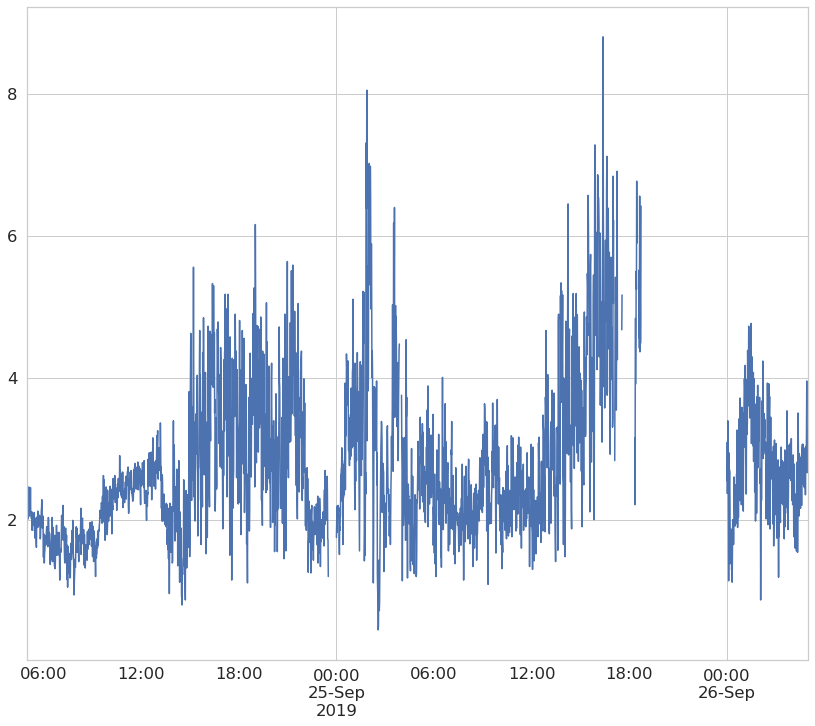

In [42]:
WLEF_ws30_df_nan.plot(figsize = (14,12))

<AxesSubplot:>

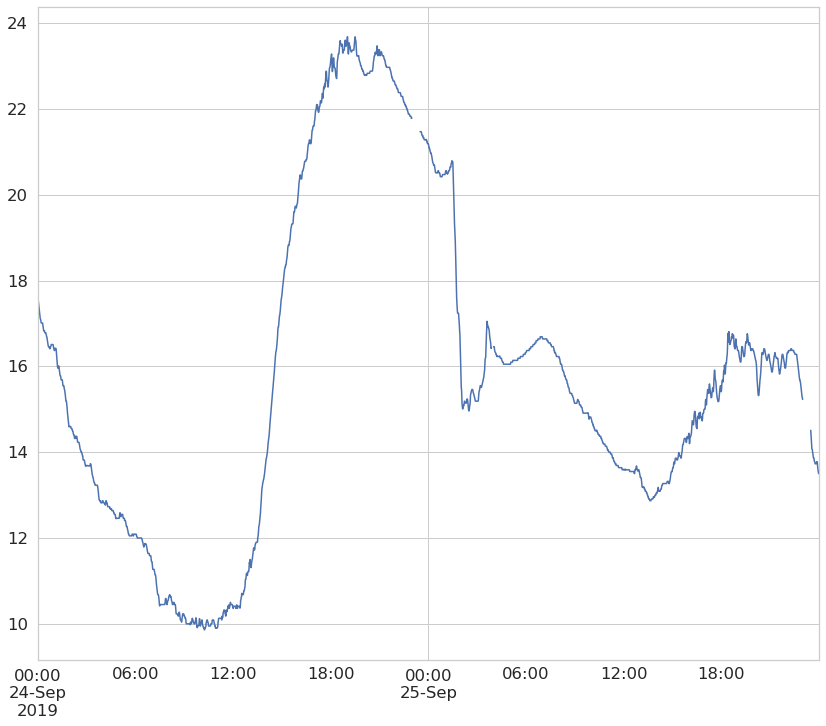

In [29]:
WLEF_T30_df_nan.plot(figsize = (14,12))

<AxesSubplot:>

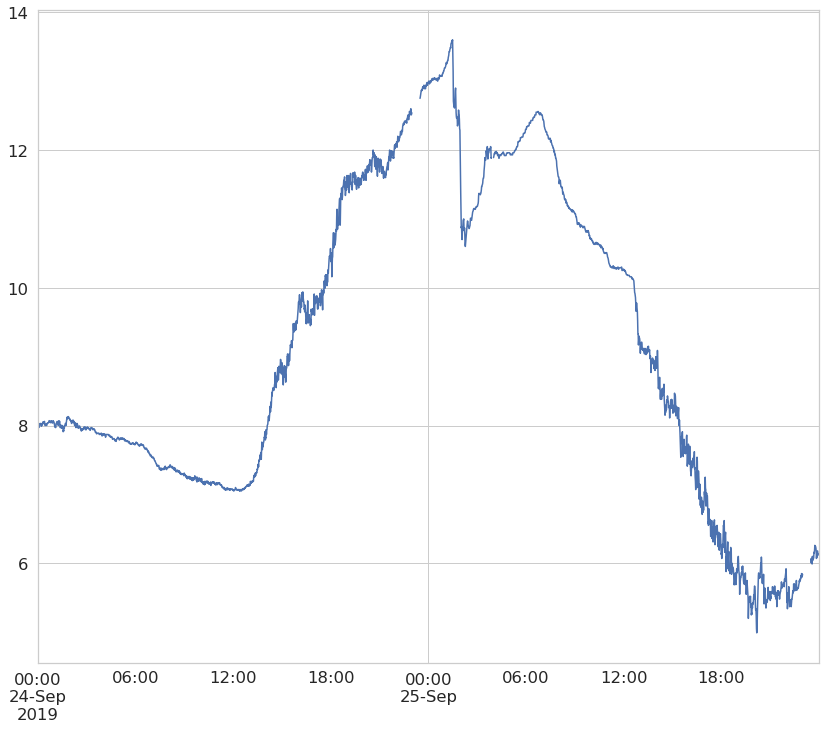

In [30]:
WLEF_q30_df_nan.plot(figsize = (14,12))

Have to adjust for the change in UTC for the WLEF data

### <font color='red'> Data analysis </font>

In [1]:
import numpy as np
import xarray as xr
import matplotlib as mpl
#mpl.use('Agg') # Must be before importing matplotlib.pyplot or pylab!
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import timeit
#start_time = timeit.default_timer()
from datetime import datetime,timedelta



Plot parameters

In [2]:
mpl.rcParams['axes.linewidth'] = 2.0 #set the value globally

plt.rc('font', family='serif',size = 16)  # controls default text layout
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=16)  # fontsize of the figure title

#plt.minorticks_on()
plt.rc('text', usetex=False)
#sns.set(font = "Garamond",font_scale=1.5,style="whitegrid")
sns.set(font_scale=1.5,style="whitegrid")
#sns.set(font = "Cambria",font_scale=1.5,style="white")

#mpl.rc_file_defaults() #undos seaborn effects

#custom fontsize, if needed
font = 12

%matplotlib inline

## Compare the measured half-hourly tower data for T,q, w'T' and w'q' with simulated values from the child2 domain. 

## IOP02

In [3]:
tower_data = xr.open_dataset('tower_and_meta_data.nc')
tower_data.close()

#calculate time variable and offset for UTC
tower_data['time'] = (tower_data.DOY+tower_data.hour/24+tower_data.minute/60/24 - 5/24)
tower_data['time'] = tower_data['time']
#set local(CDT) time as a coordinate
tower_data = tower_data.set_coords(['time'])

#subset for 2019 Sep 24 and Sep25
#f1 = tower_data.time>=267
#f2 = tower_data.time<=269
#subset for 2019 Aug 23 and 24
f1 = tower_data.time>=235
f2 = tower_data.time<=237
tower_data = tower_data.where(f1 & f2, drop=True)

#subset all >30m towers 
tower_data = tower_data.where(tower_data.z_meas>=30, drop=True)

tower_name_list = tower_data.tower.values

#subset for time, because simulated tower data only start at 5:00 CDT on 23rd and go on till 20:00 on 24
#for IOP02
tower_data = tower_data.isel(timestep=slice(9,88))

